Short Description of the Assignement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math as mat

In [ ]:
#Create the dataset with requested input
height= np.round( np.random.normal(1.70, 0.15, 1000), 2)
weight= np.round( np.random.normal(70.00, 10, 1000), 2)
age= np.round(np.random.normal(35, 10, 1000),0)
income= abs(np.round( np.random.normal(50000, 15000, 1000), 2))
# .5 is prob dist of Male and Female
gender = np.random.choice(['Male', 'Female'], size=1000, p=[.5, .5]) 


# Create a DataFrame from arrays 
data = pd.DataFrame({'height': height, 'weight': weight, 'age': age, 'income': income, 'gender': gender})

#np_pers = np.stack((age, height, weight, gender, income), axis=-1)

print(data)
print()

data.head()

#Data Information
data.info()
print()
#statistical summary
data.describe(include = 'all').transpose()

     height  weight   age    income  gender
0      1.48   68.22  28.0  41822.76    Male
1      1.52   75.46  32.0  24604.88  Female
2      1.86   65.32  39.0  61193.48  Female
3      1.44   56.44  44.0  46508.79  Female
4      1.66   63.86  28.0  61994.54  Female
..      ...     ...   ...       ...     ...
995    1.68   63.45  51.0  28320.75  Female
996    1.73   56.02  36.0  57971.83  Female
997    1.63   85.01  33.0  76084.99    Male
998    1.95   68.97  53.0  72255.20    Male
999    2.10   58.44  32.0  61611.15  Female

[1000 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  1000 non-null   float64
 1   weight  1000 non-null   float64
 2   age     1000 non-null   float64
 3   income  1000 non-null   float64
 4   gender  1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
height,1000.0,NaN,NaN,NaN,1.69733,0.152665,1.17,1.59,1.69,1.8,2.13
weight,1000.0,NaN,NaN,NaN,70.17471,10.193391,35.57,63.445,69.715,76.9525,101.52
age,1000.0,NaN,NaN,NaN,34.457,9.797762,-1.0,28.0,34.5,41.0,69.0
income,1000.0,NaN,NaN,NaN,49583.06328,15240.215379,5099.29,39044.375,49065.31,60294.475,104311.94
gender,1000,2,Male,512,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#compute mean, median standard deviation and variance of data[column]
def descstat(column,opt):
    np_pers = np.zeros
    opt = str(opt)
    if column == 'age' or column == 'height' or column == 'weight' or column == 'income':
        age_M = np.round(stat.mean(data[column]),2)
        age_Med = np.round(stat.median(data[column]),2)
        age_V = np.round(stat.variance(data[column]),2)
        age_SD = np.round(mat.sqrt(age_V),2)
        np_pers = np.array((age_M, age_Med, age_V, age_SD, age_V))
        if opt == 'prnt':
            print(f'for column\t{str.upper(column)}\tMean={age_M},\tMedian={age_Med},\tStandard deviation={age_SD},\tVariance ={age_V}')
        return np_pers

In [4]:
#compute mode of data[column]
def descstat2(column,opt):
    retval = ''
    opt = str(opt)
    if column == 'gender':
        age_Mo = stat.mode(data[column])
        retval = age_Mo
        if opt == 'prnt':
            print(f'for column\t{str.upper(column)}\tMode={str(age_Mo)}')
    return retval

In [16]:
#first way to compute descr. stats
DesStatA = descstat('age','prnt')
DesStatH = descstat('height','prnt')
DesStatW = descstat('weight','prnt')
DesStatI = descstat('income','prnt')
DesStatG = descstat2('gender','prnt')

#Descr.stats 2nd way to test
#determine df from data.columns for the reuired columns
df = (['age', 'height', 'weight', 'income'])
ds = pd.DataFrame({
    'Mean': np.round(data[df].mean(),2),
    'Median': np.round(data[df].median(),2),
    'Standard Deviation': np.round(data[df].std(),2),
    'Variance': np.round(data[df].var(),1)
})
print(ds)
print(f'{data['gender'].mode()}')

for column	AGE	Mean=34.46,	Median=34.5,	Standard deviation=9.8,	Variance =96.0
for column	HEIGHT	Mean=1.7,	Median=1.69,	Standard deviation=0.14,	Variance =0.02
for column	WEIGHT	Mean=70.17,	Median=69.72,	Standard deviation=10.19,	Variance =103.91
for column	INCOME	Mean=49583.06,	Median=49065.31,	Standard deviation=15240.22,	Variance =232264164.8
for column	GENDER	Mode=Male
            Mean    Median  Standard Deviation     Variance
age        34.46     34.50                9.80         96.0
height      1.70      1.69                0.15          0.0
weight     70.17     69.72               10.19        103.9
income  49583.06  49065.31            15240.22  232264164.8
0    Male
Name: gender, dtype: object


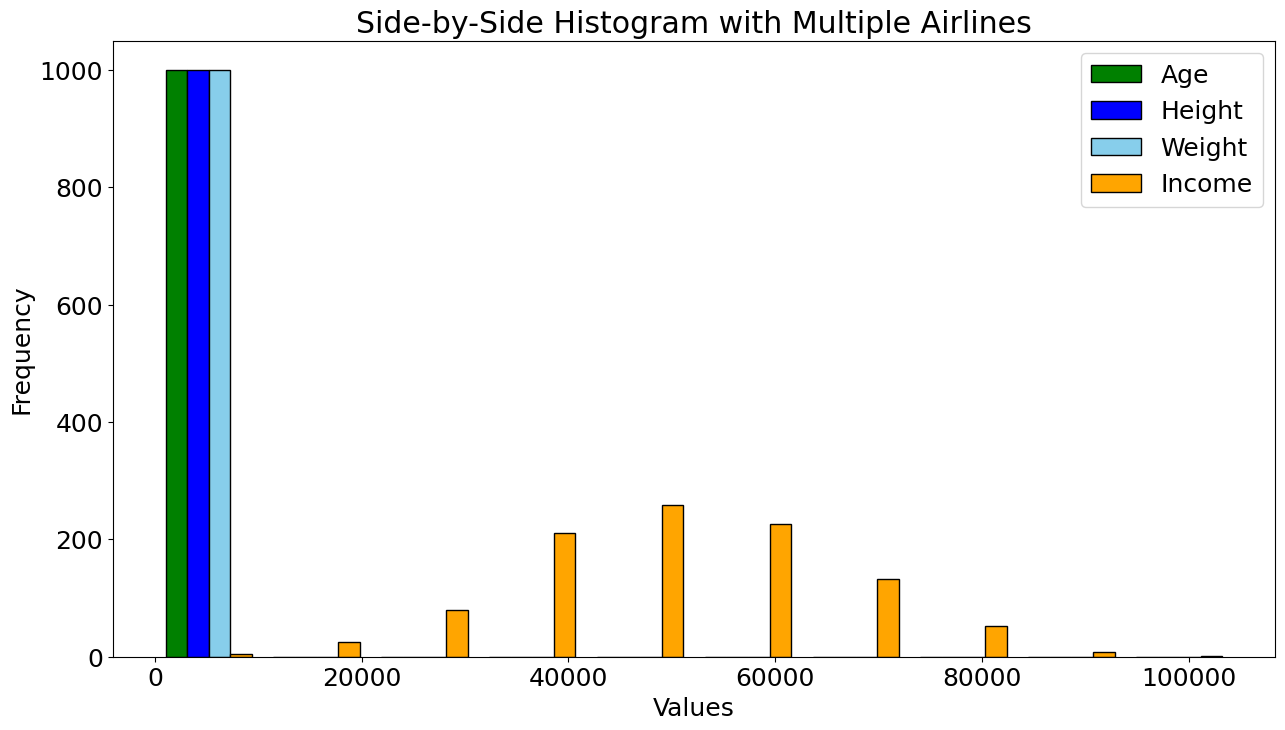

In [ ]:
plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 18
plt.rcParams['figure.dpi'] = 300
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
labels = ['Age', 'Height', 'Weight', 'Income']
# Make the histogram using a list of lists
# Normalize the flights and assign colors and labels

#plt.hist([age, height, weight, income], bins = int(180/15), normed=True,
#x1=list(data[data['gender'] == 'Male']['age'])
##x2=list(data[data['gender'] == 'Male']['height'])
#x3=list(data[data['gender'] == 'Male']['weight'])
#x4=list(data[data['gender'] == 'Male']['income'])

#x=['Male','Female']


plt.hist([data['age'],data['height'],data['weight'],data['income']], bins=10, color=['green','blue','skyblue','orange'], edgecolor='black',label=labels)

# Plot formatting
plt.legend(labels)
#Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Side-by-Side Histogram')

plt.show()

In [7]:
def plt_hist(column):
    plt.figure(figsize=(15, 10))
    plt.rcParams['font.size'] = 18
    plt.rcParams['figure.dpi'] = 200
    go=False
    #colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
    if column == 'age':
        col='blue'
        go=True
    elif column == 'height':
        col='green'
        go=True
    elif column == 'weight':
        col='yellow'
        go=True
    elif column == 'income':
        col='orange'
        go=True
    else:
        go=False
    if go:
        plt.hist(data[column], bins=30, color=col, edgecolor='black', histtype='barstacked')
# Plot formatting
    fmt=str.upper(column)
    print(fmt)
    plt.legend(column)
#Adding labels and title
    plt.xlabel(f'Values for {fmt}')
    plt.ylabel(f'Frequency for {fmt}')
    plt.title(f'Basic Histograms for {fmt}');
    plt.show()


AGE


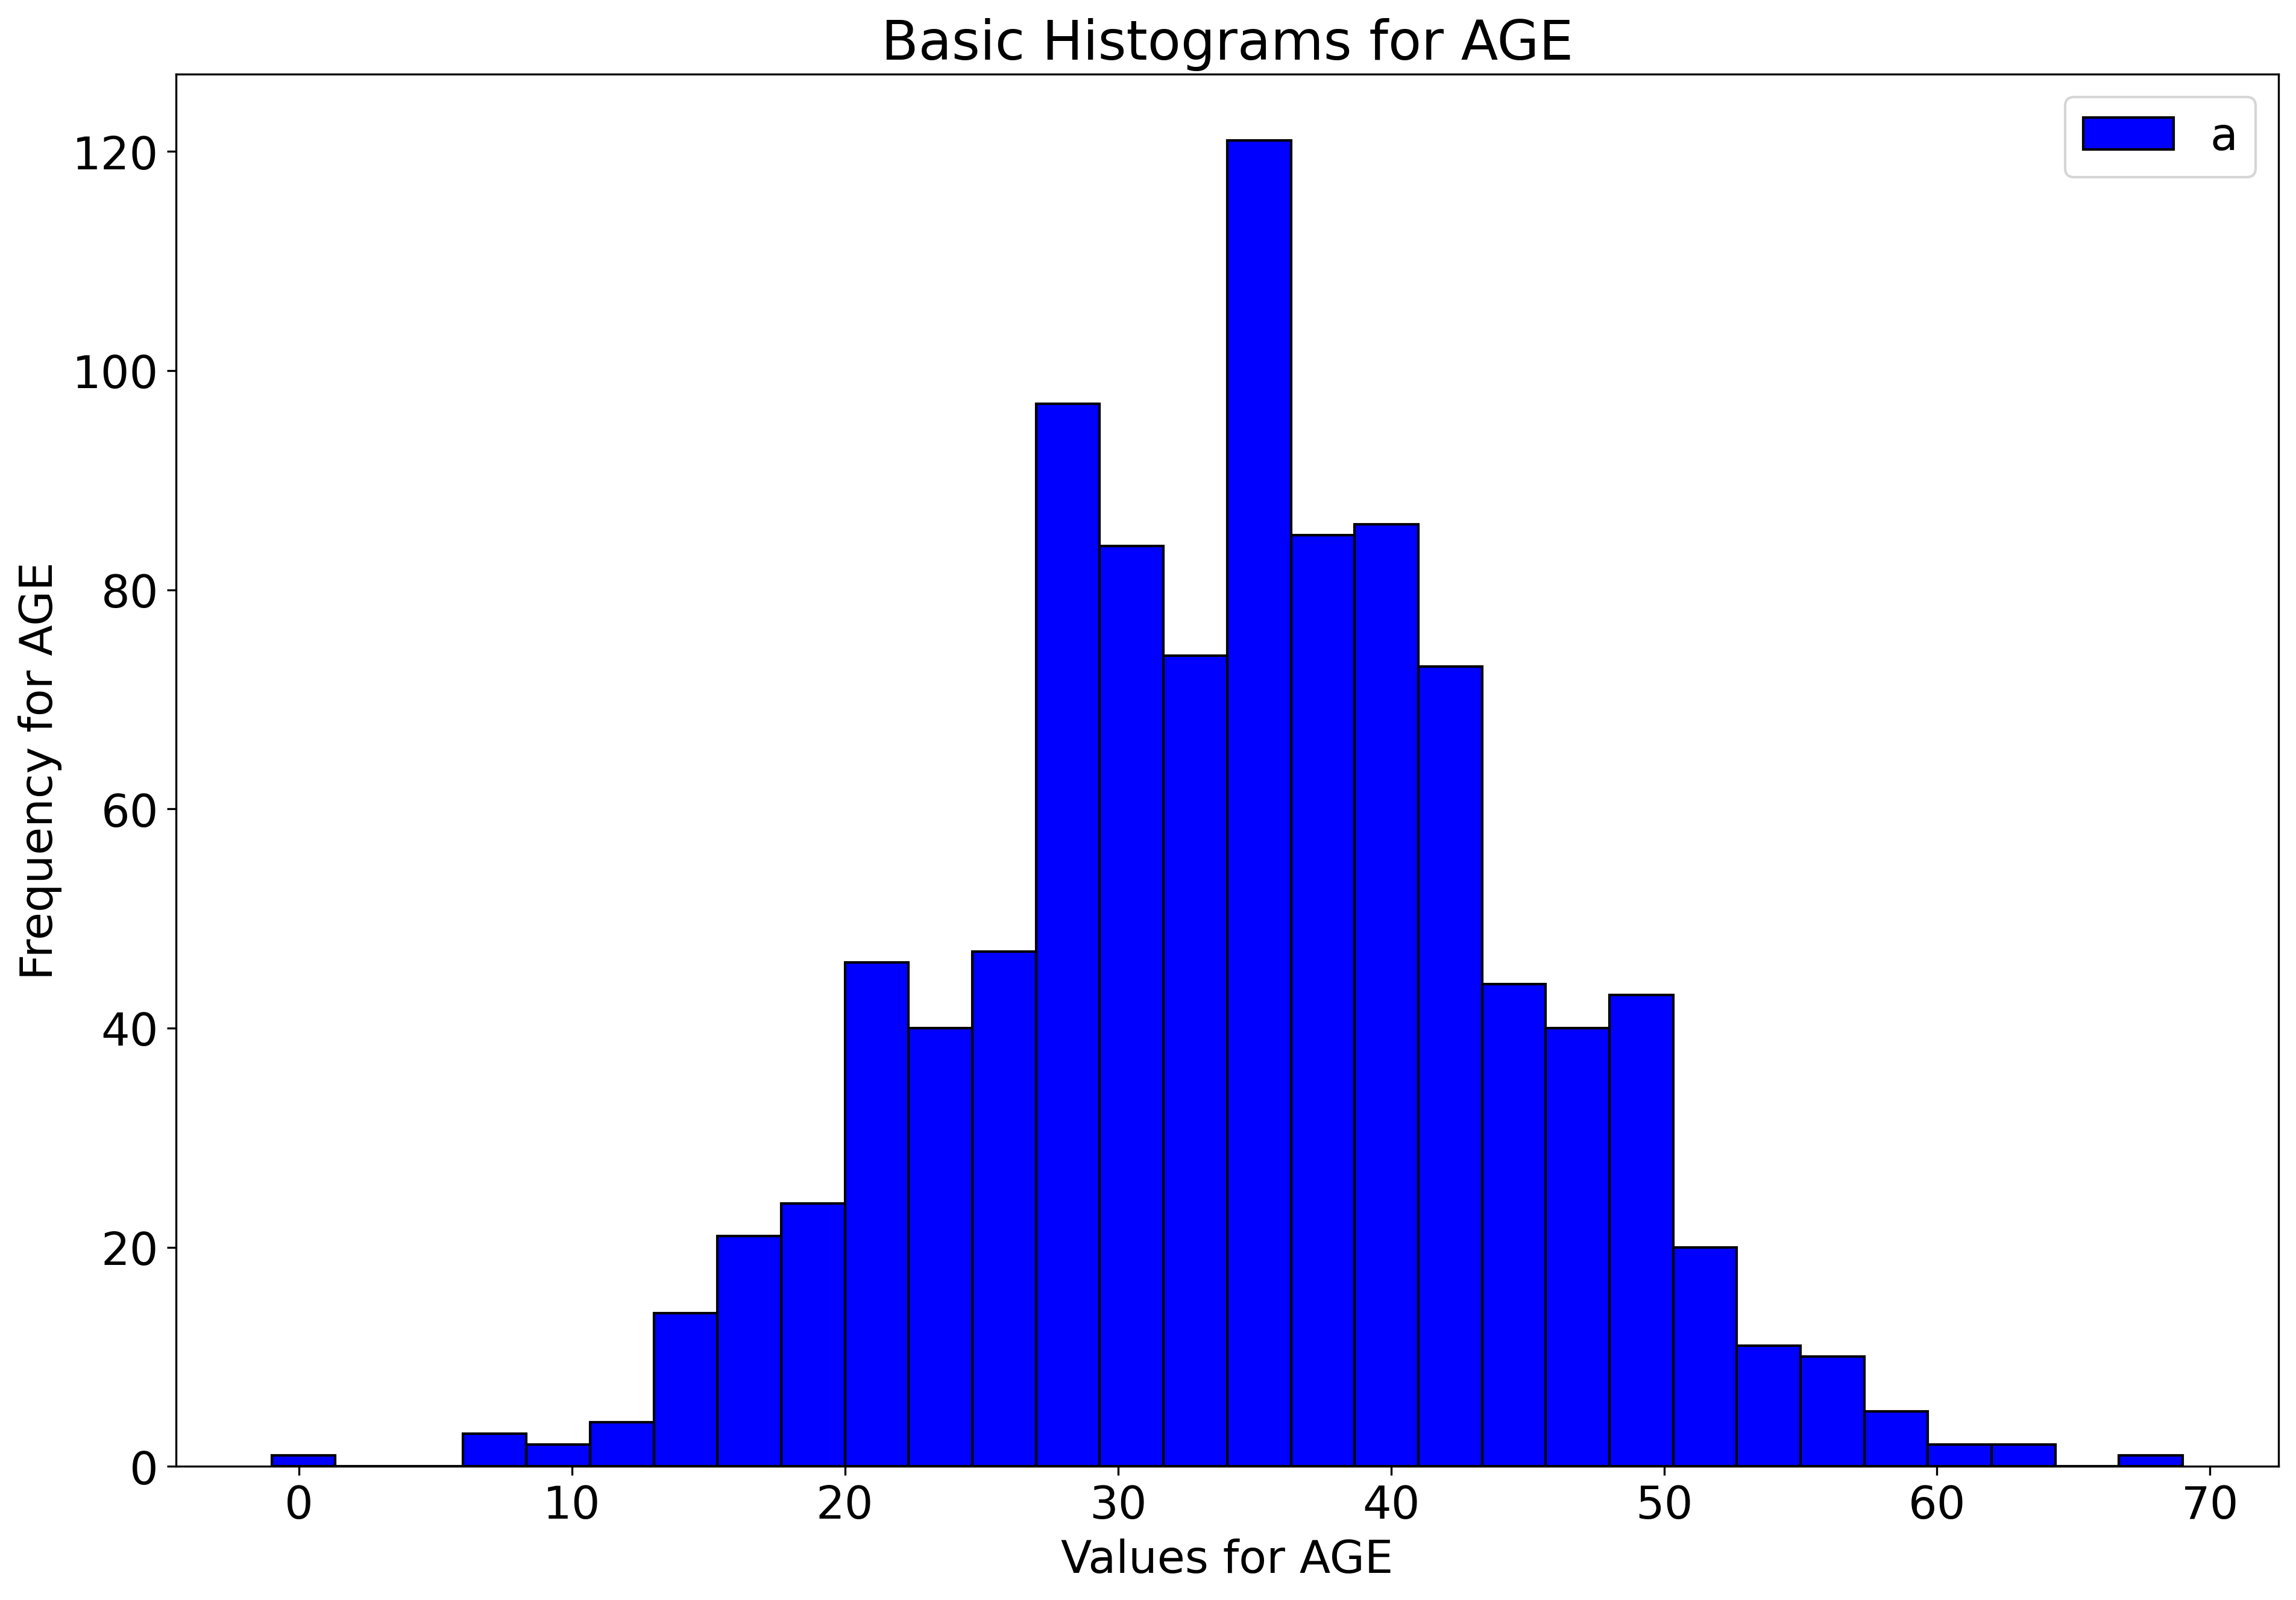

HEIGHT


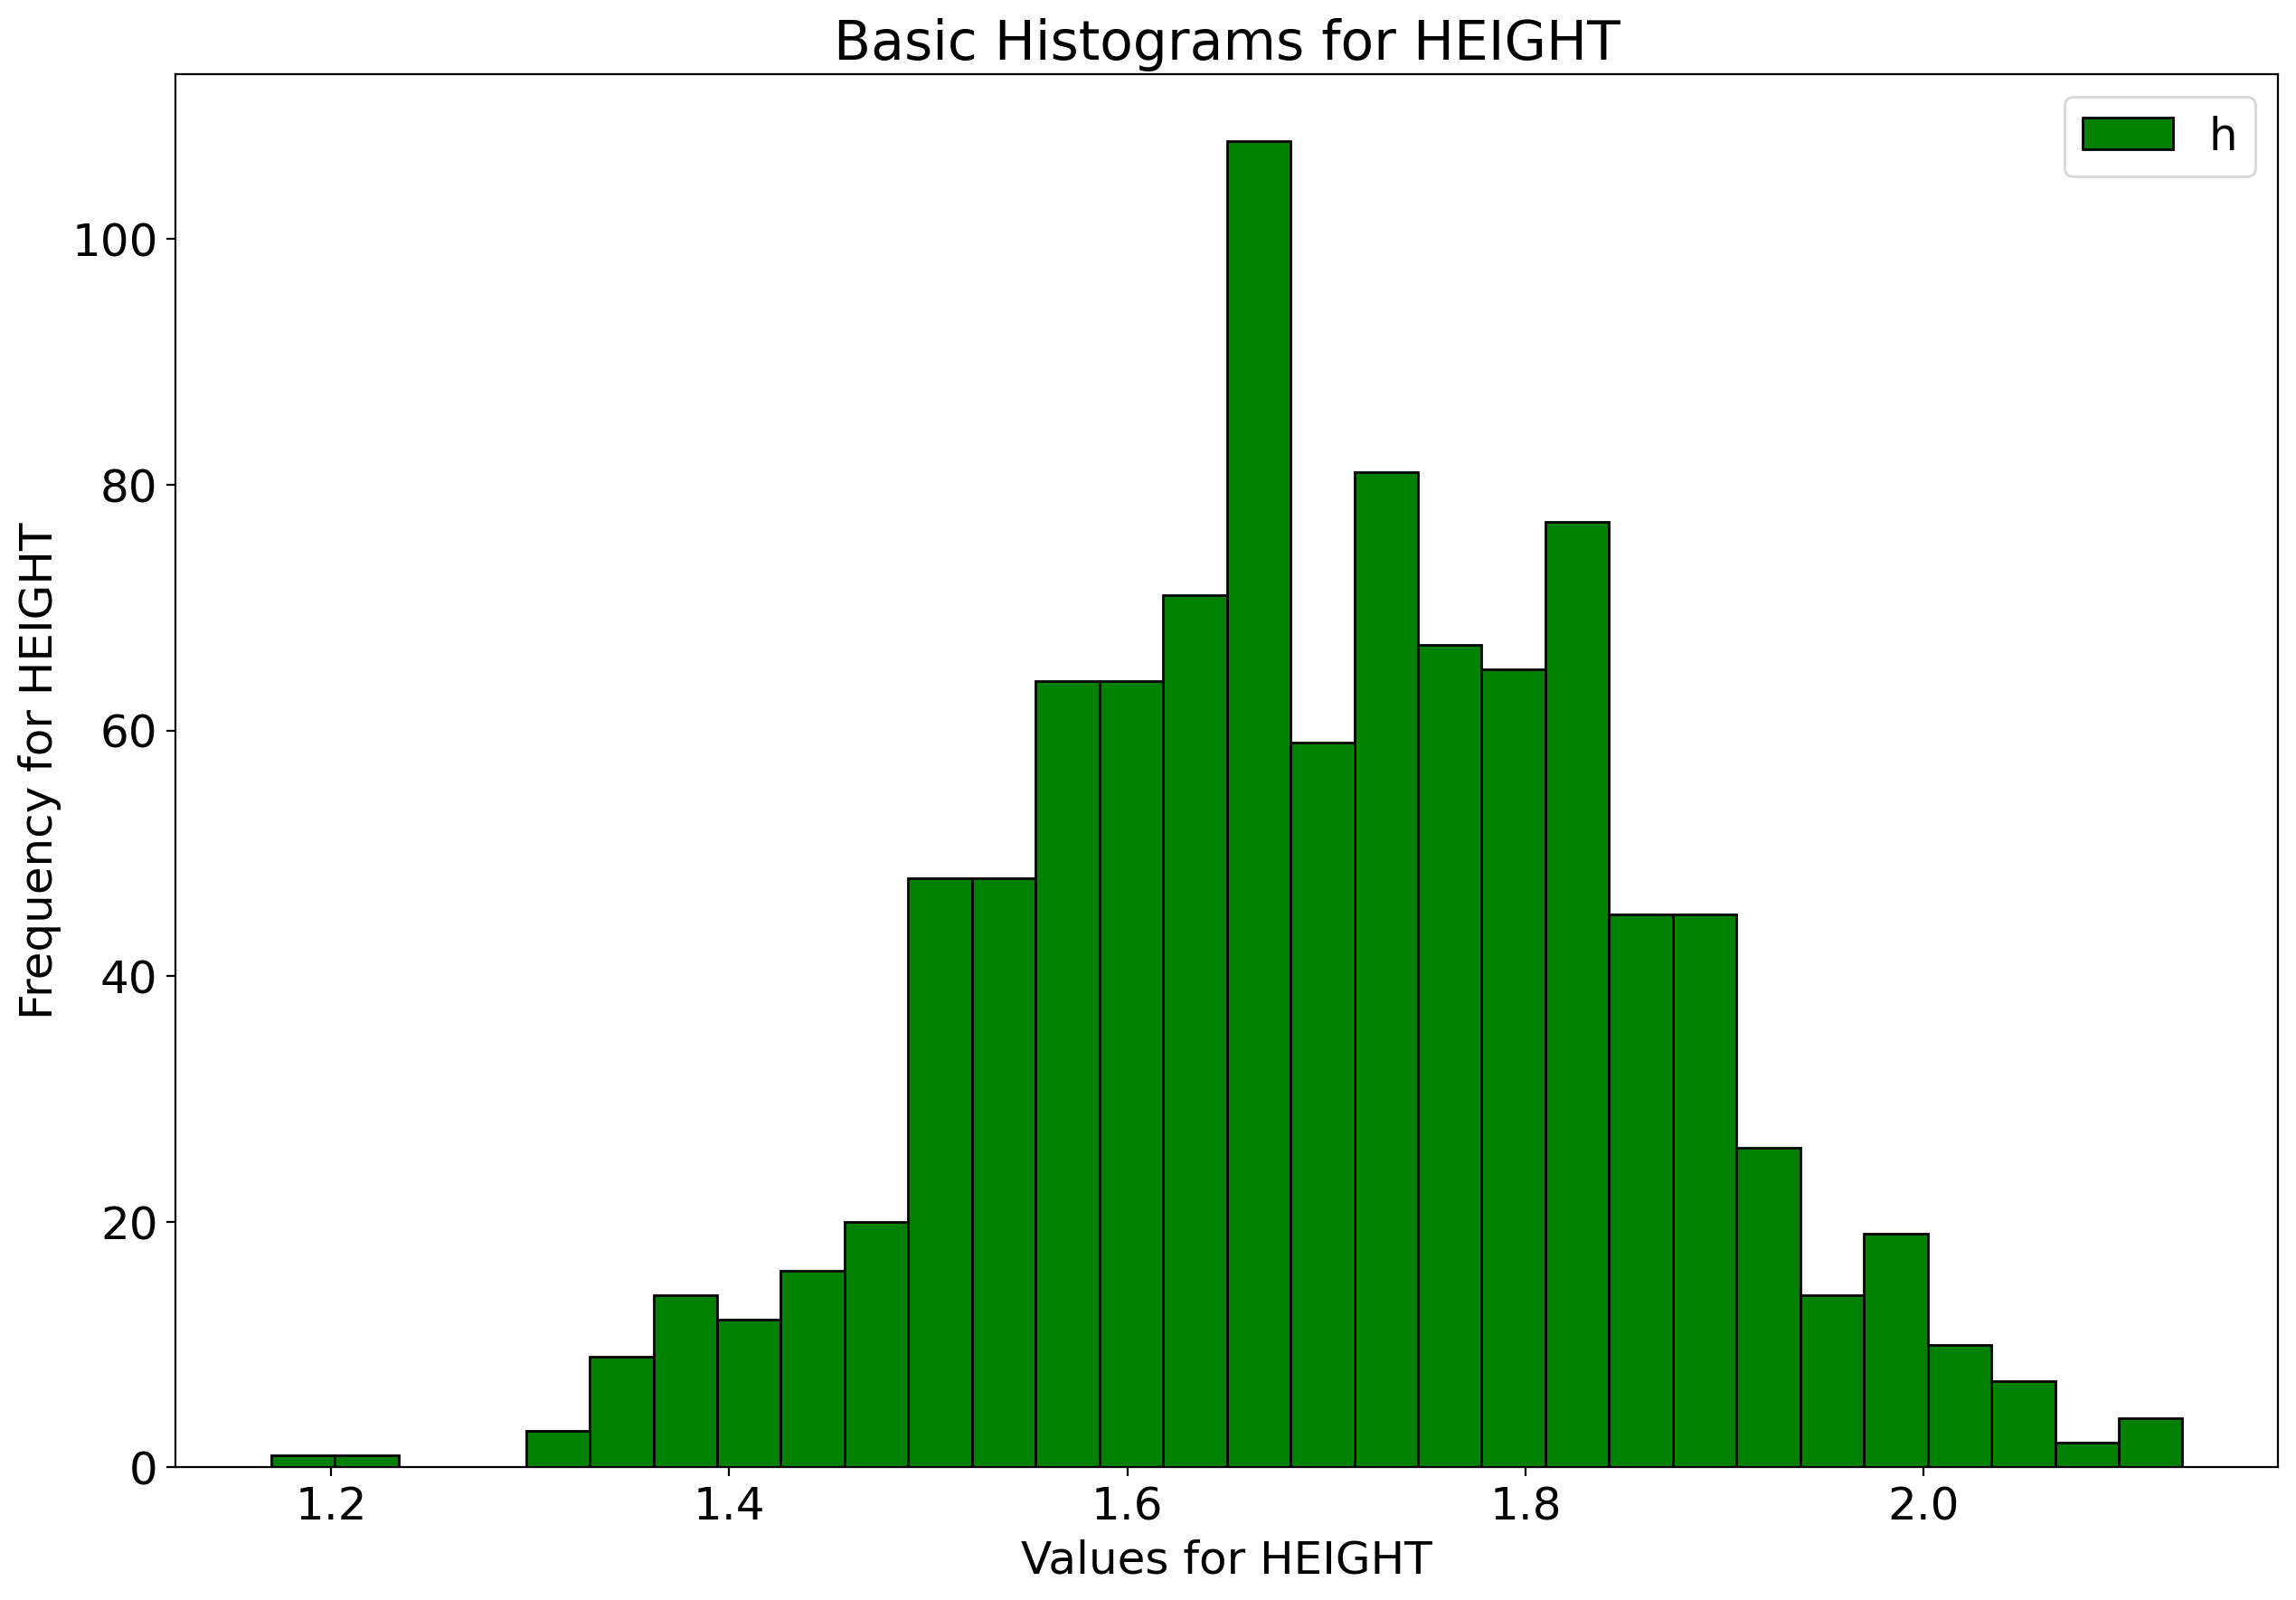

WEIGHT


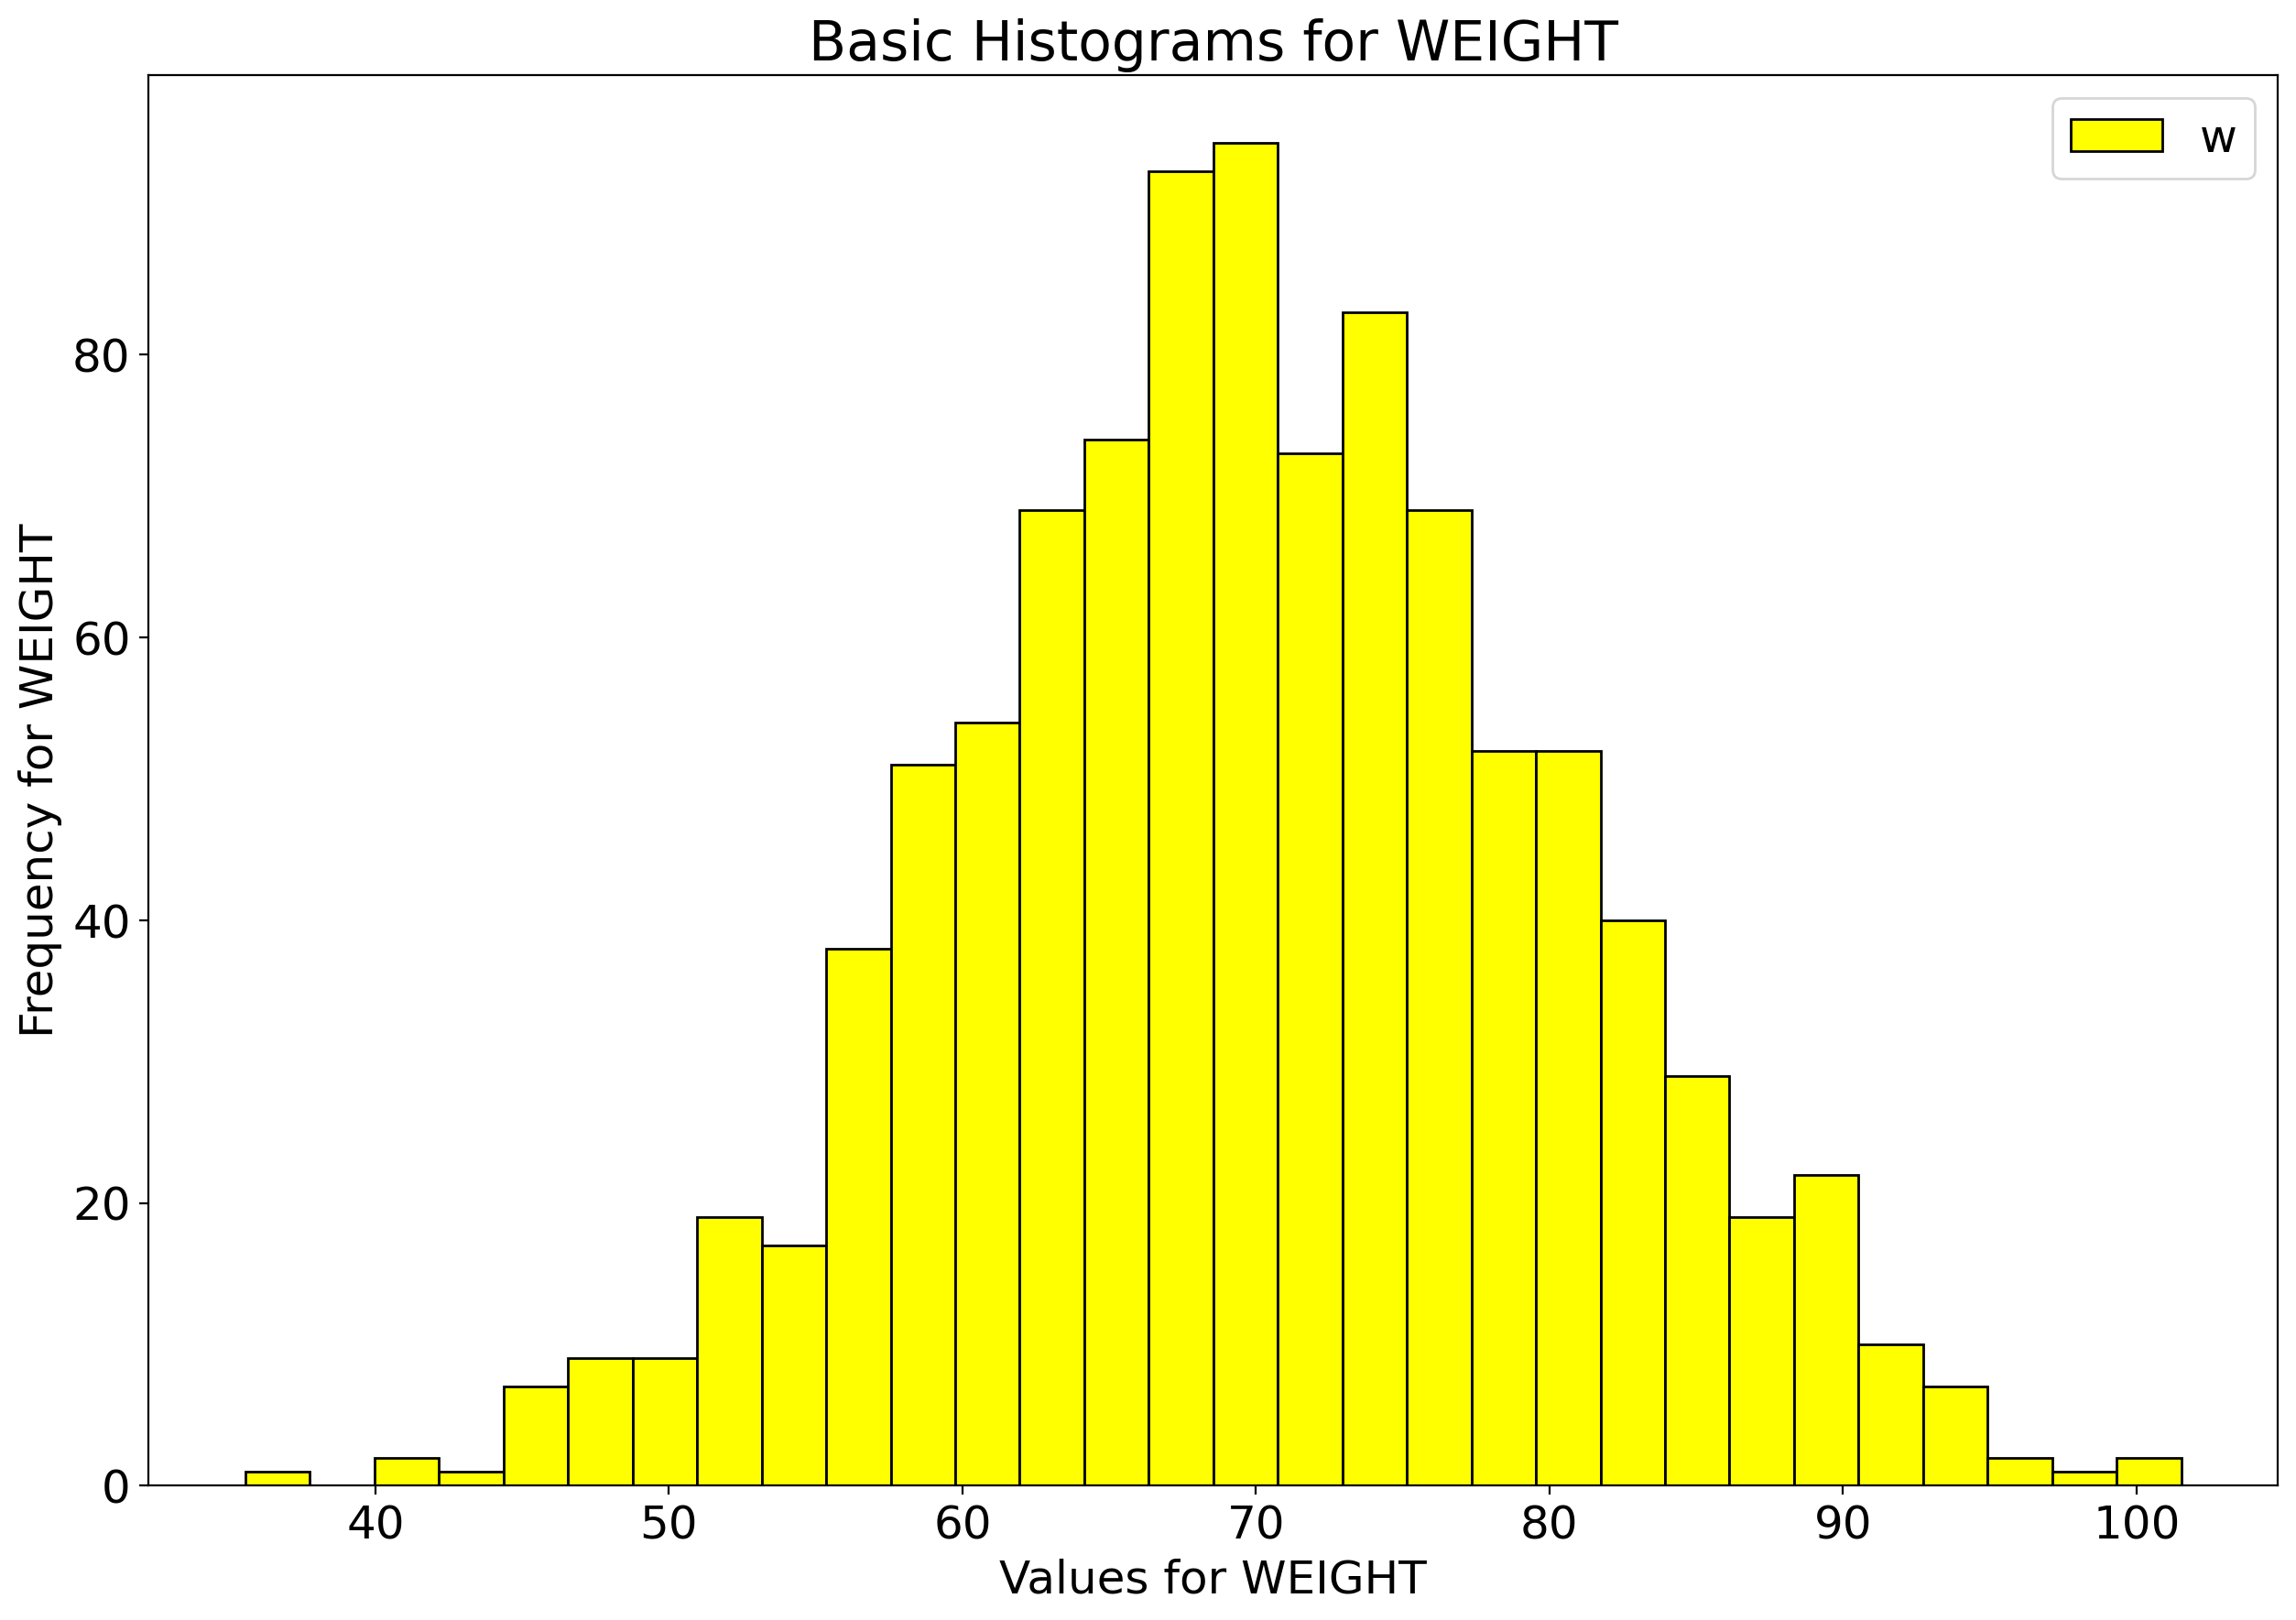

INCOME


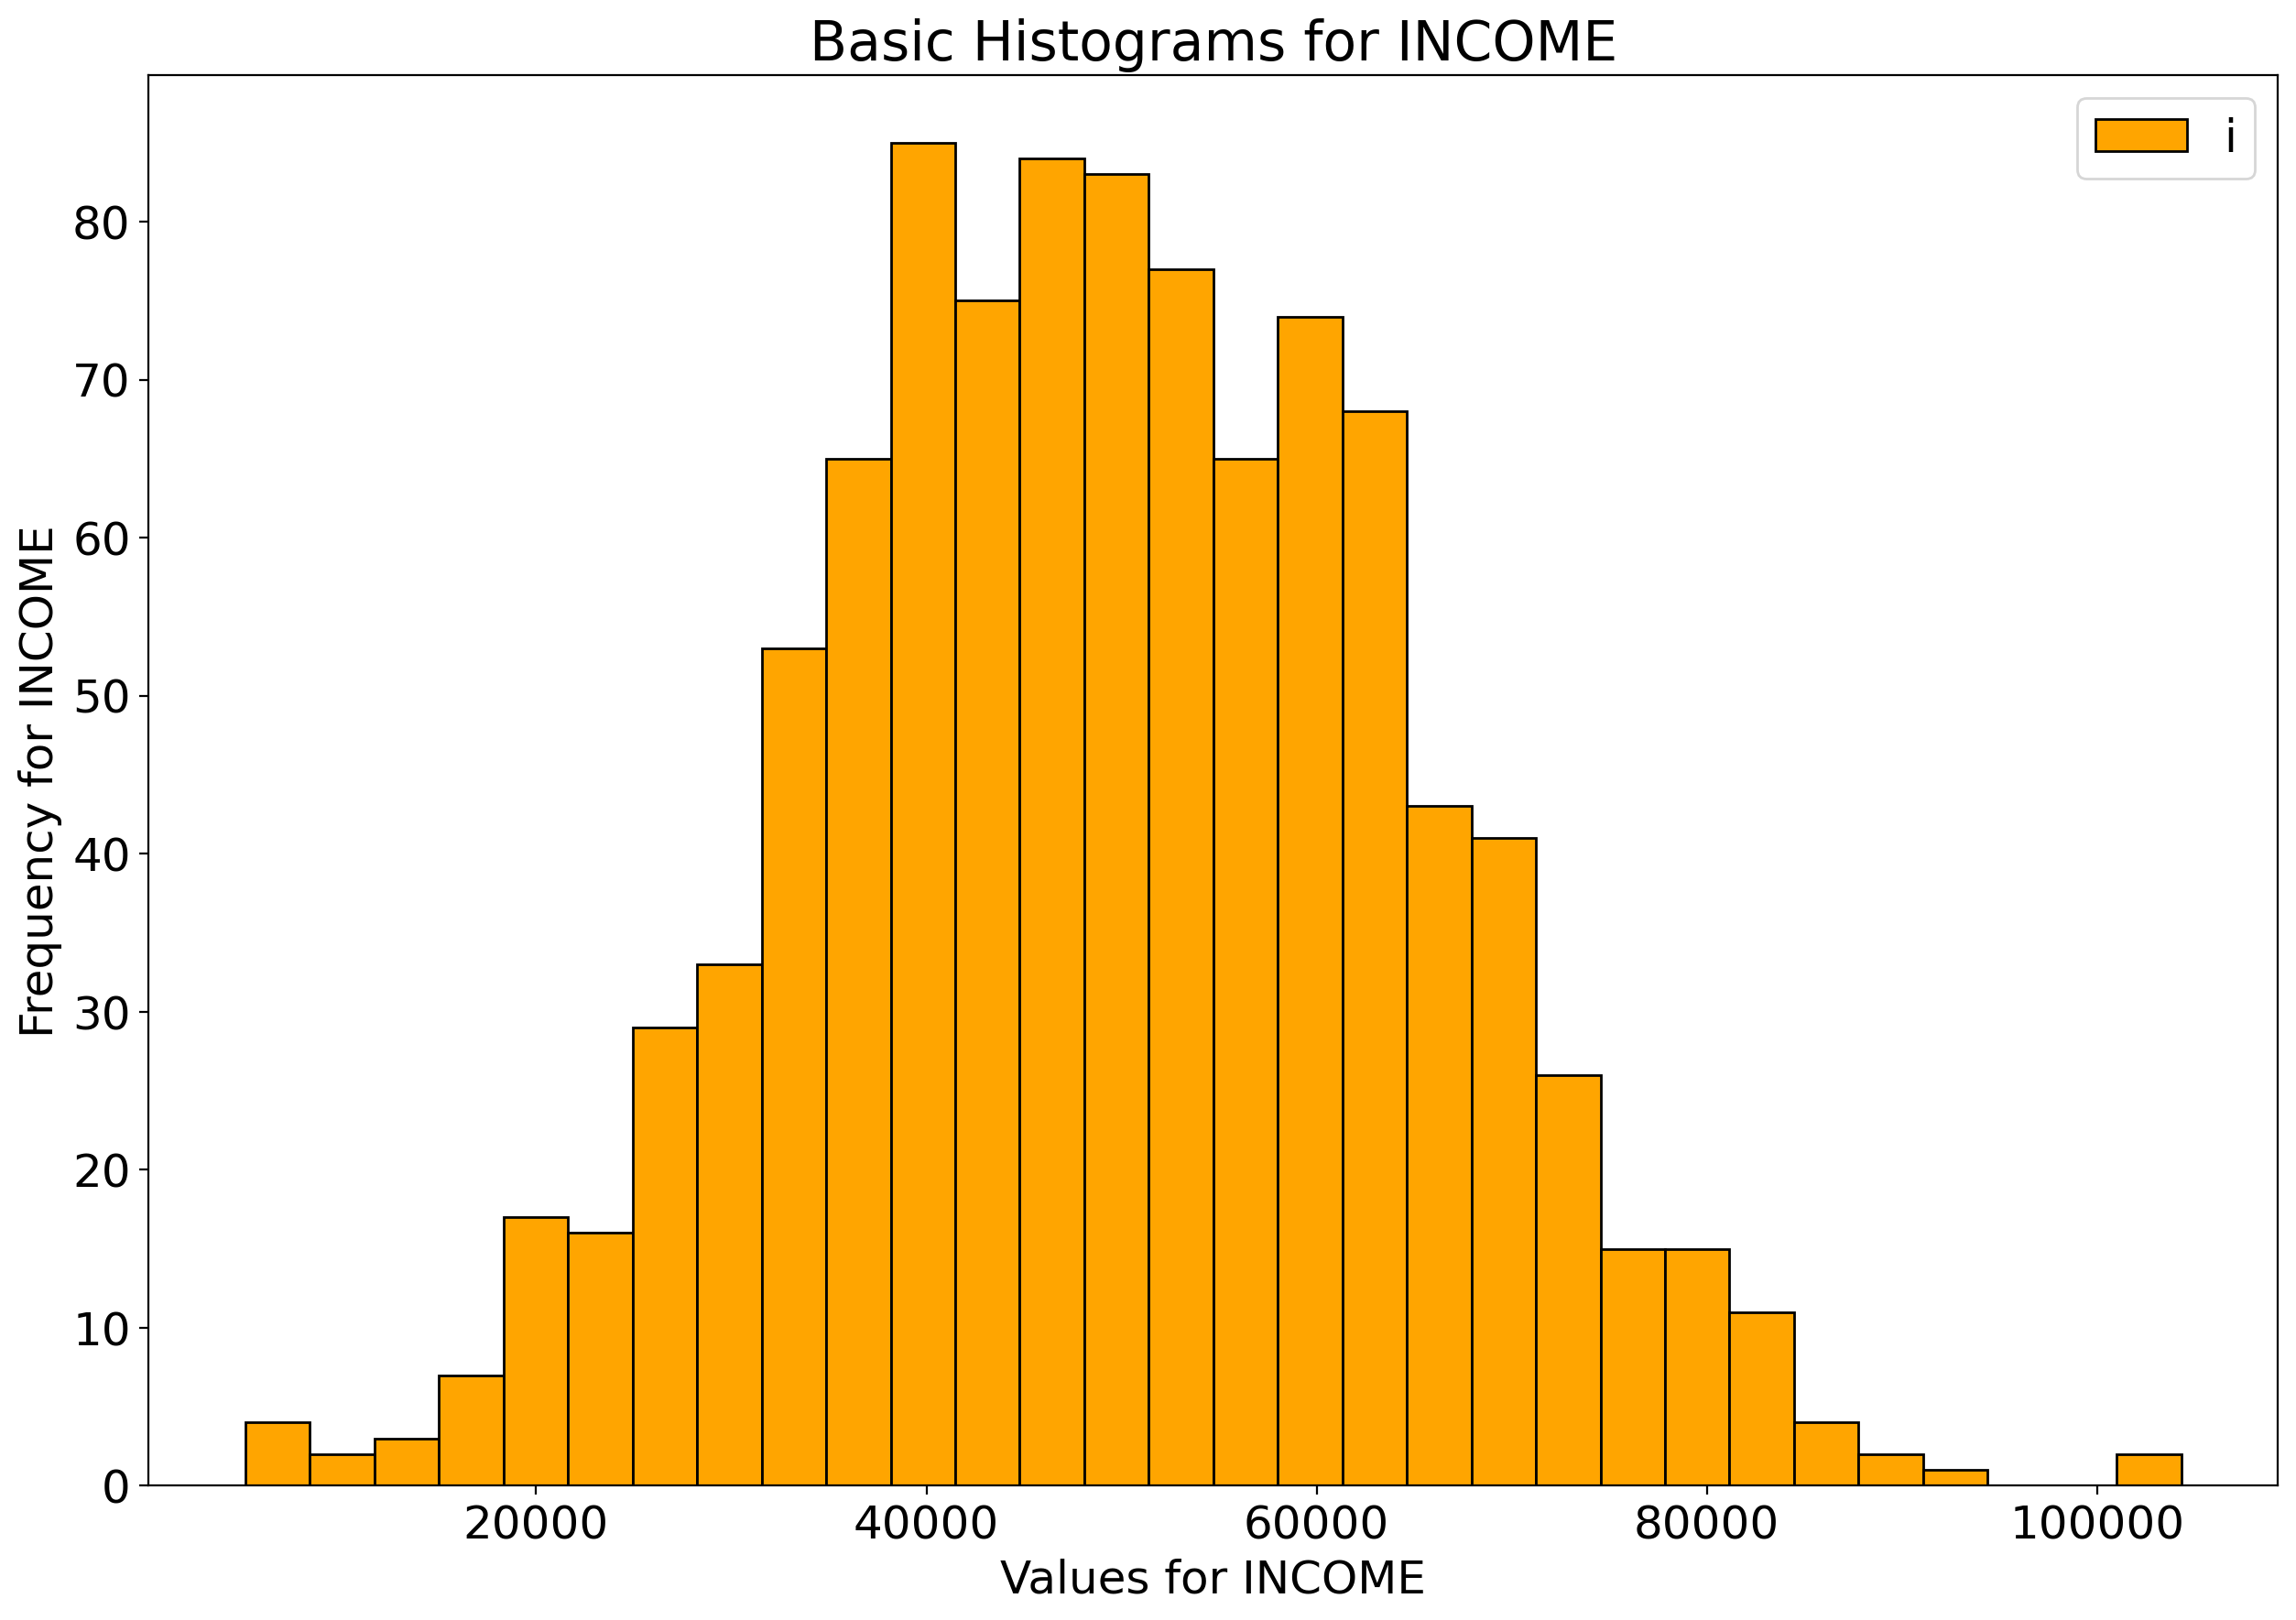

In [8]:
names = ['age', 'height', 'weight', 'income']
for col in names:
    plt_hist(col)

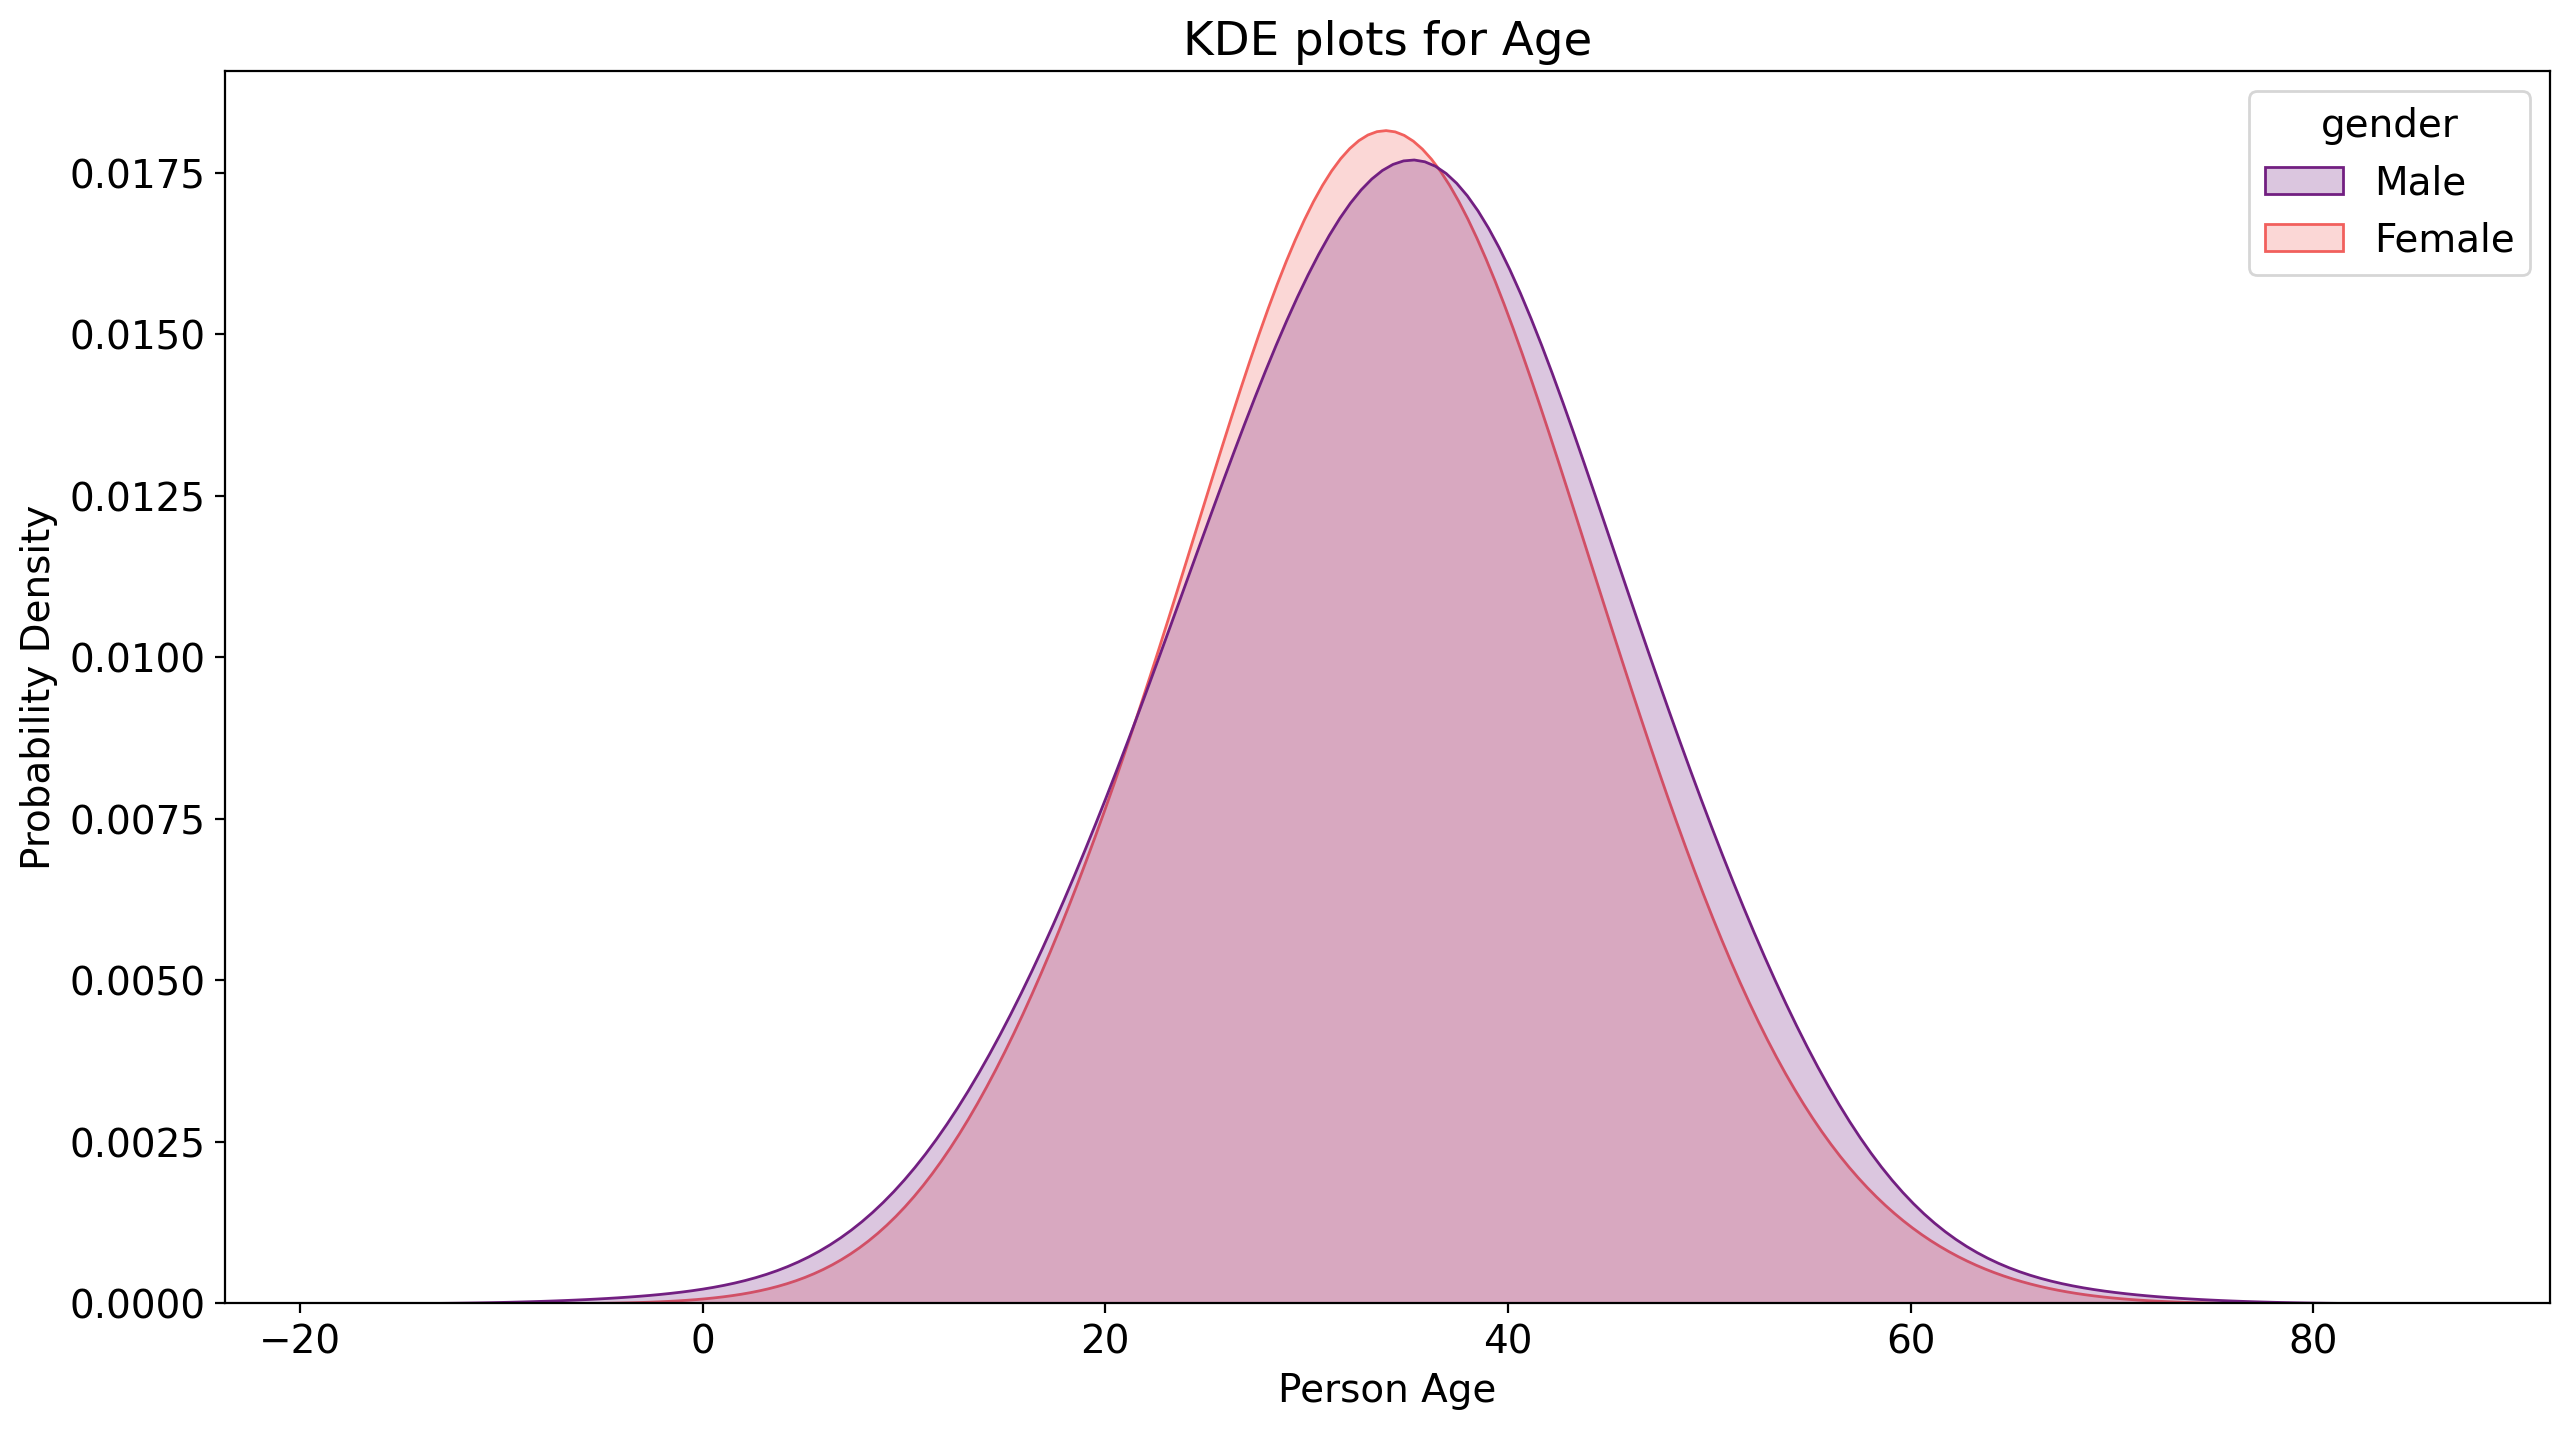

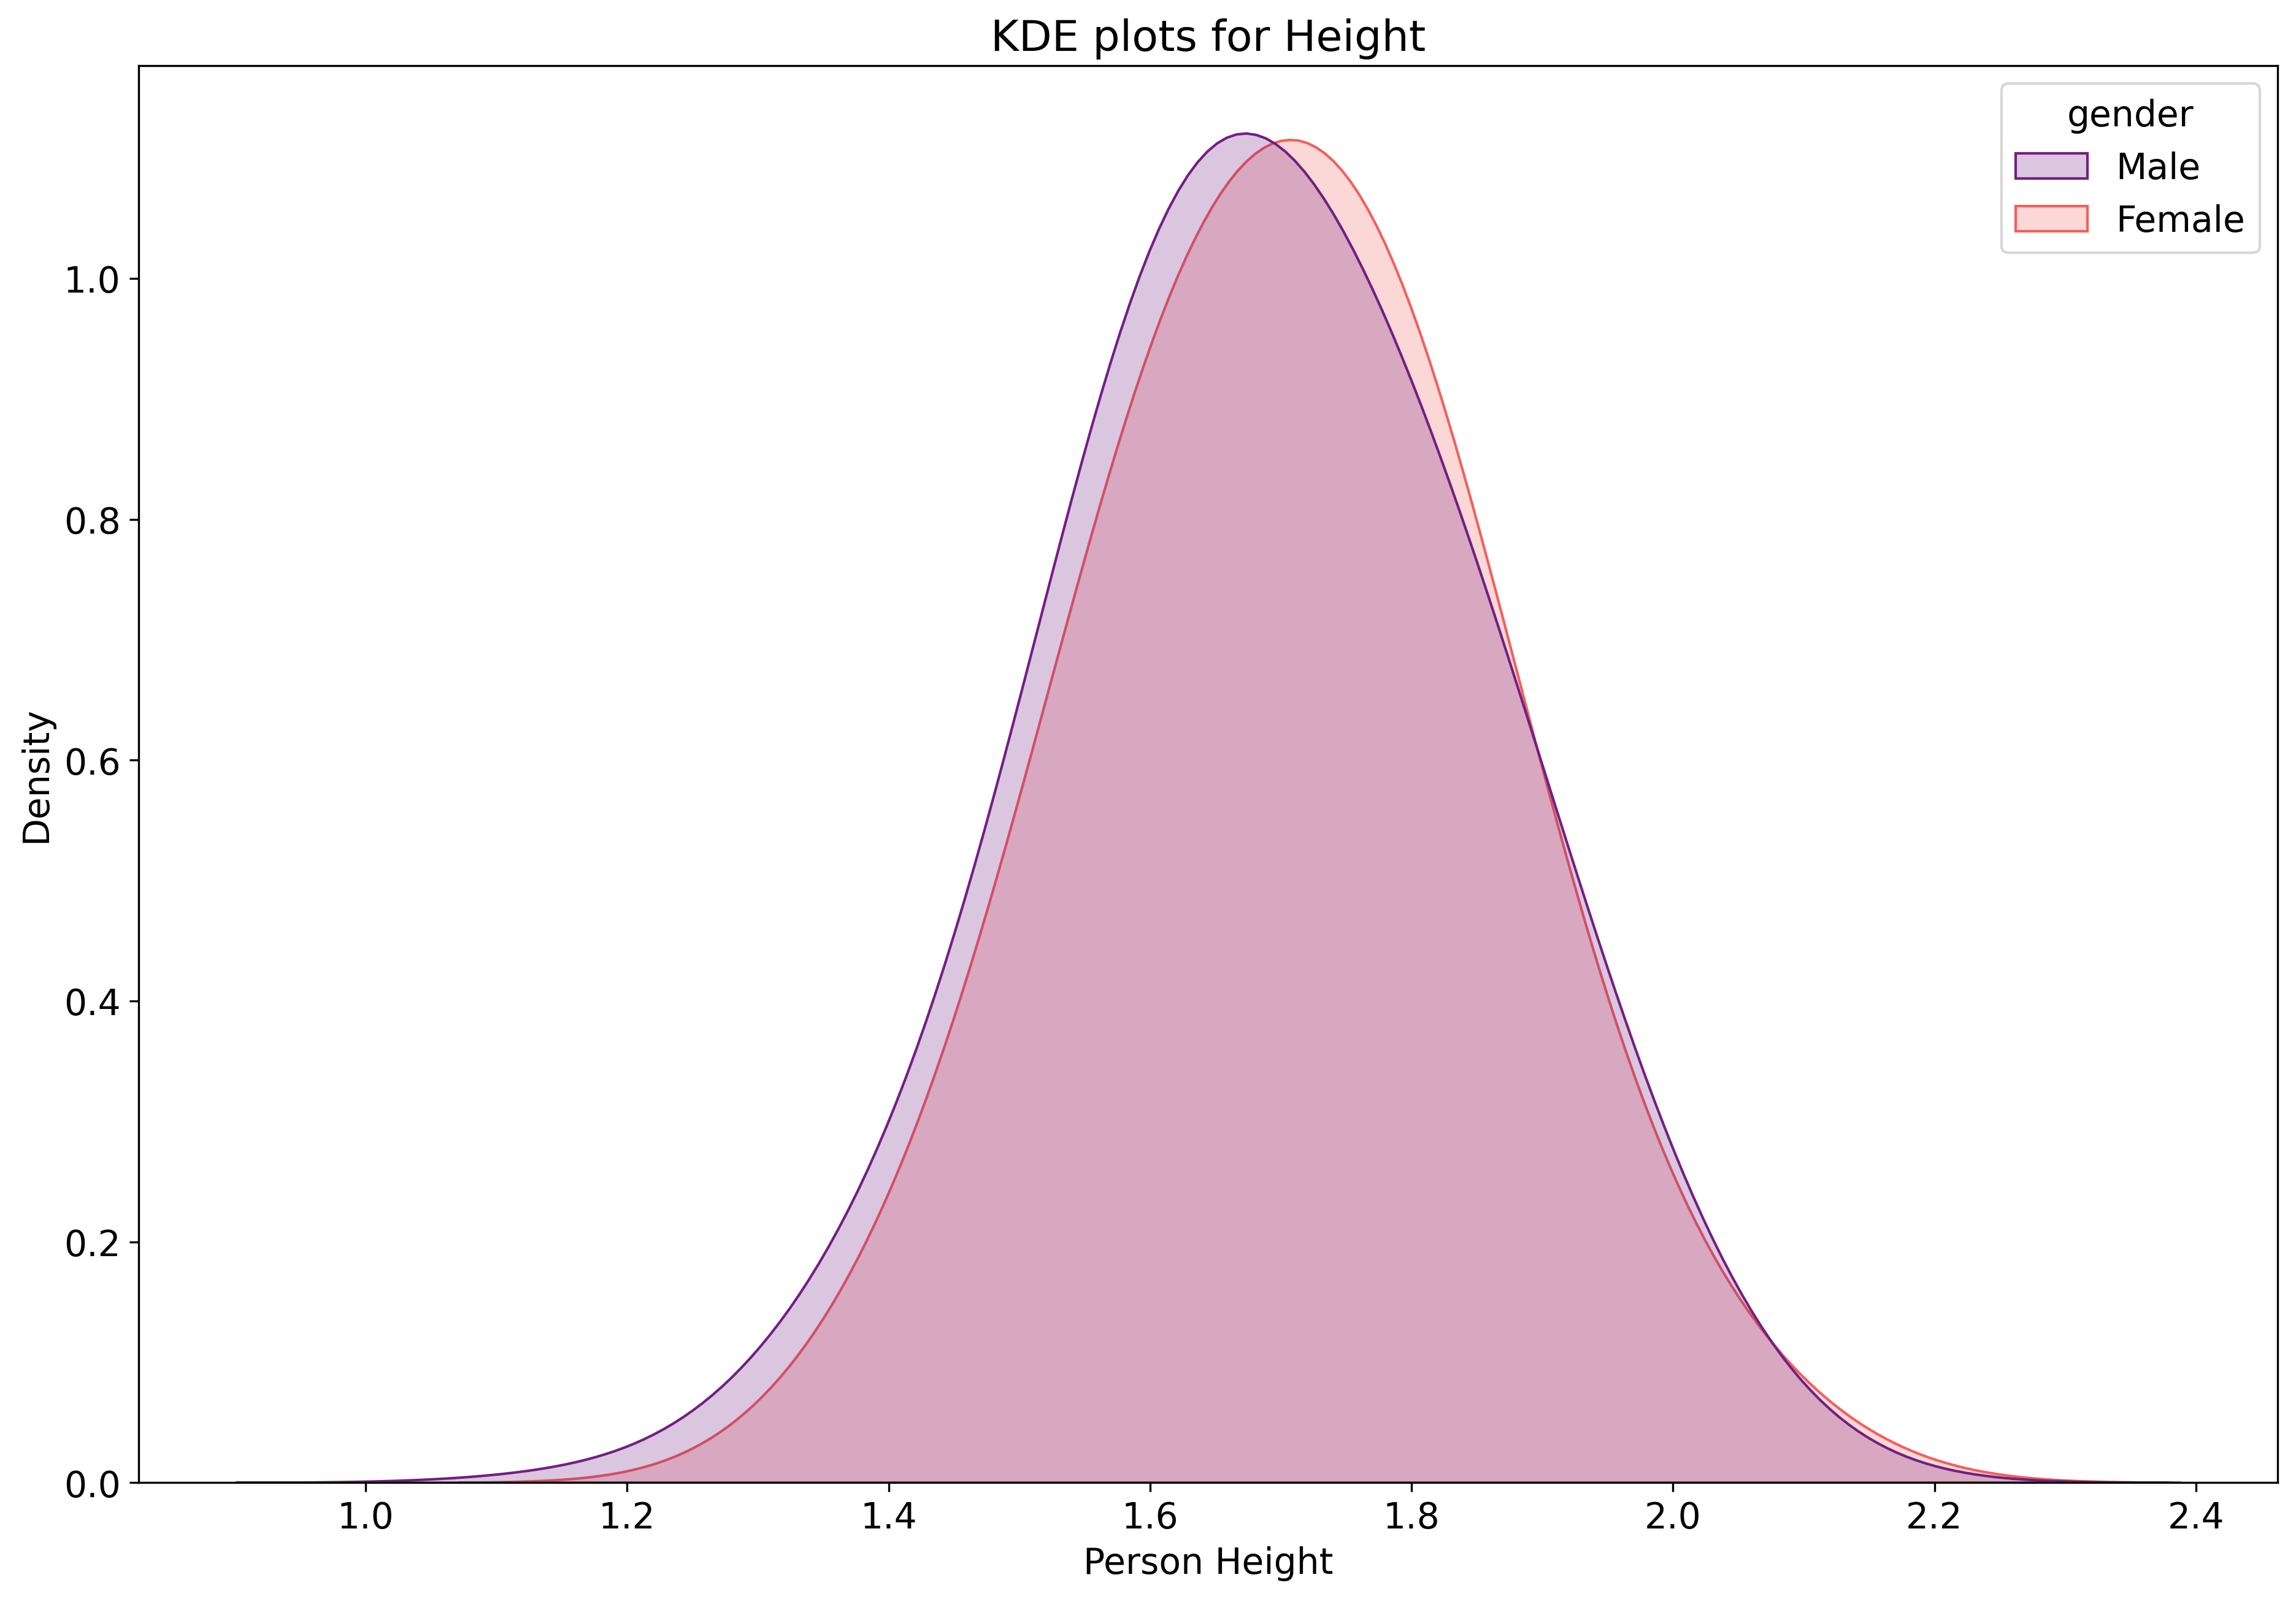

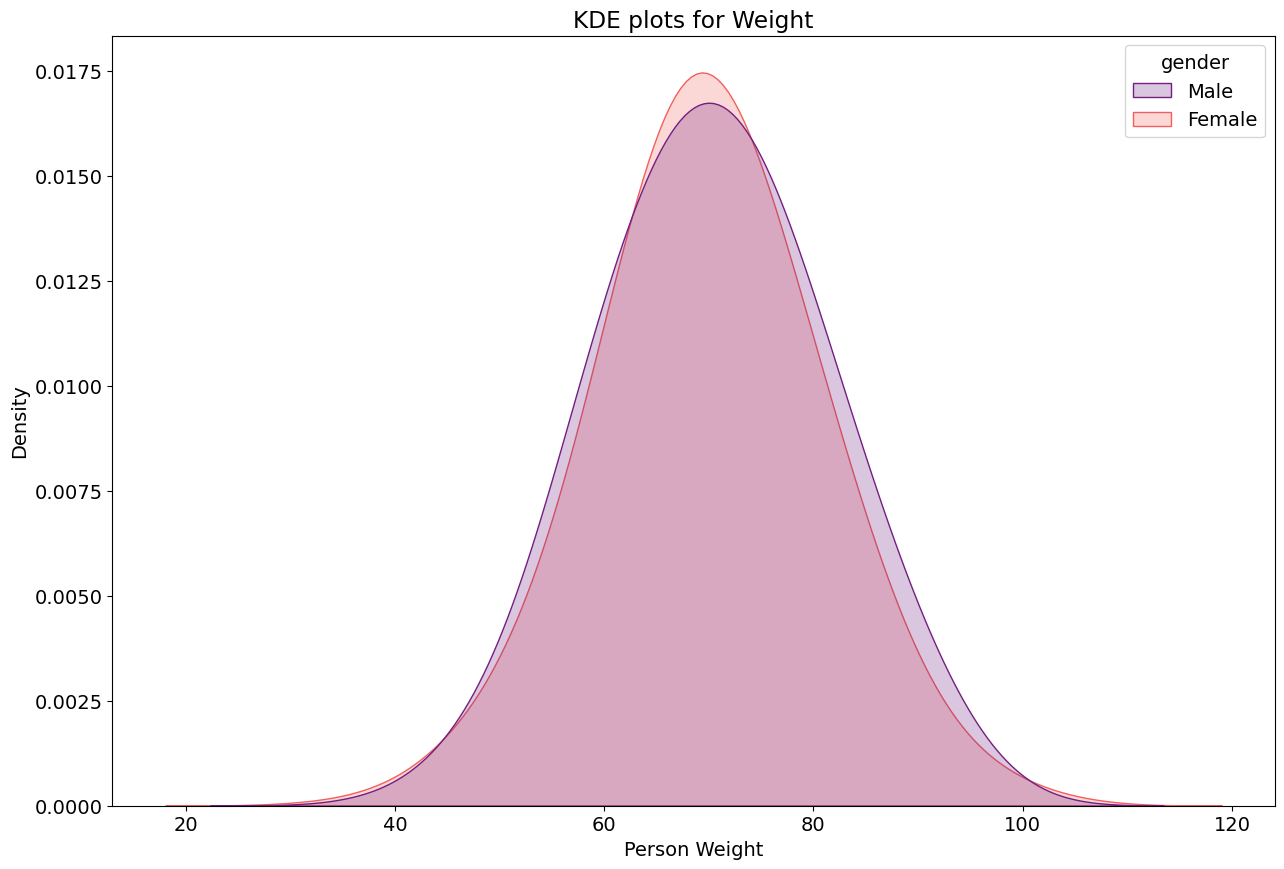

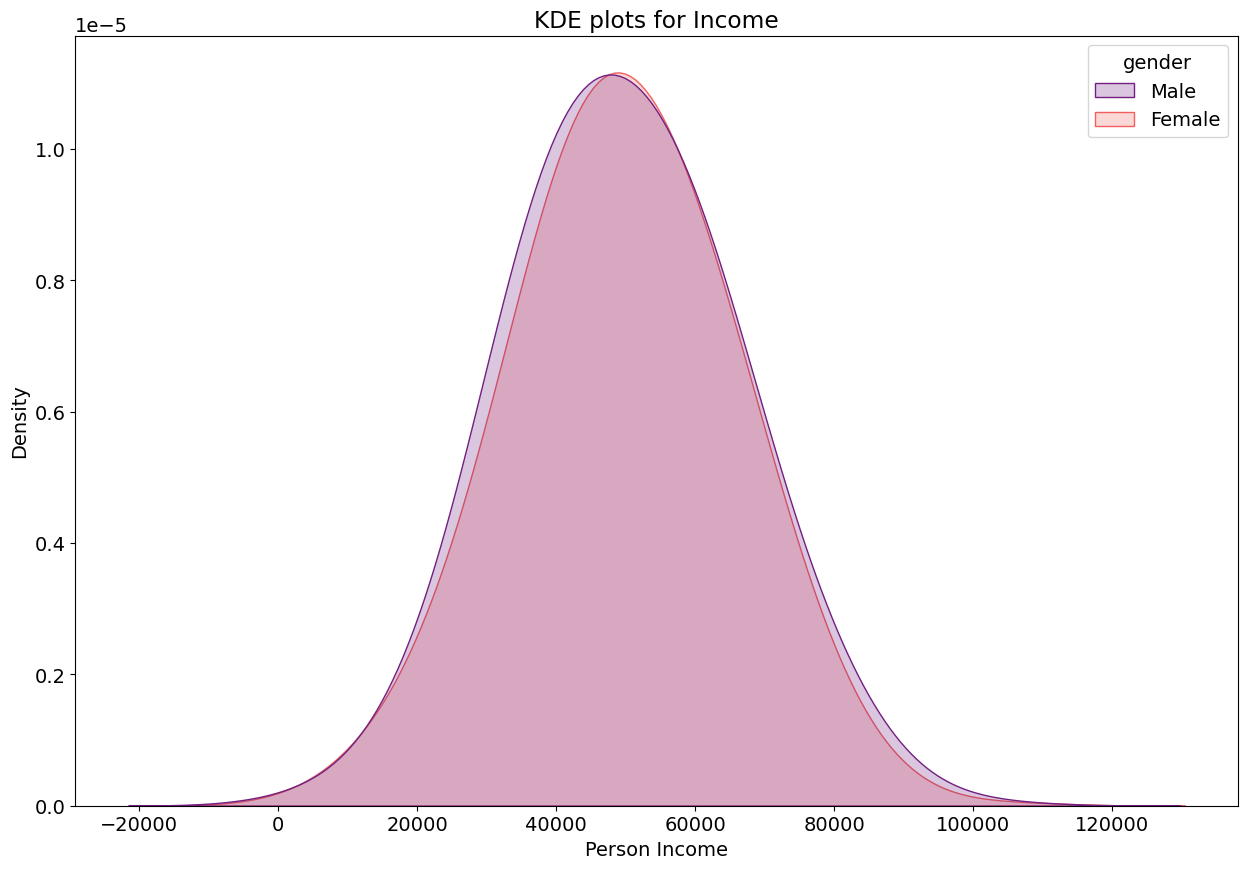

In [9]:
# Plotting the KDE Plot
plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 300
#sns.kdeplot(data.loc[(data['gender']=='Female'),'age'], color='blue', fill=True, legend=True)
#sns.kdeplot(data.loc[(data['gender']=='Male'),'age'], color='green', fill=True, legend=True)
sns.kdeplot(data=data, x='age',hue='gender',fill = True, palette = 'magma', bw_method = 'scott', bw_adjust = 2)
plt.legend=['Male','Female']
plt.xlabel('Person Age')
plt.ylabel('Probability Density')
plt.title('KDE plots for Age')
plt.show()

plt.figure(figsize=(15, 10))
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
sns.kdeplot(data=data, x='height',hue='gender', fill=True, palette = 'magma', bw_method = 'scott', bw_adjust=2)
plt.xlabel('Person Height')
plt.title('KDE plots for Height')
plt.show()

plt.figure(figsize=(15, 10))
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
sns.kdeplot(data=data, x='weight',hue='gender', fill=True, palette = 'magma', bw_method = 'scott', bw_adjust=2)
plt.xlabel('Person Weight')
plt.title('KDE plots for Weight')
plt.show()

plt.figure(figsize=(15, 10))
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
sns.kdeplot(data=data, x='income',hue='gender', fill=True, palette = 'magma', bw_method = 'scott', bw_adjust=2)
plt.xlabel('Person Income')
plt.title('KDE plots for Income')
plt.show()


In [10]:
#Boxplots to identify outliers

def myBoxPlot(col):
    column=str.lower(col)
    go=False
    if column == 'age':
        colr='blue'
        go=True
    elif column == 'height':
        colr='green'
        go=True
    elif column == 'weight':
        colr='yellow'
        go=True
    elif column == 'income':
        colr='orange'
        go=True
    else:
        go=False
    if go:
        plt.figure(figsize=(15, 8))
        plt.rcParams['font.size'] = 14
        plt.rcParams['figure.dpi'] = 300
        sns.boxplot(data=data, x='gender', y=column, color=colr)
        plt.title(f'Box Plot of {col} by Gender')
        plt.xlabel('Gender')
        plt.ylabel(col)
        plt.show()

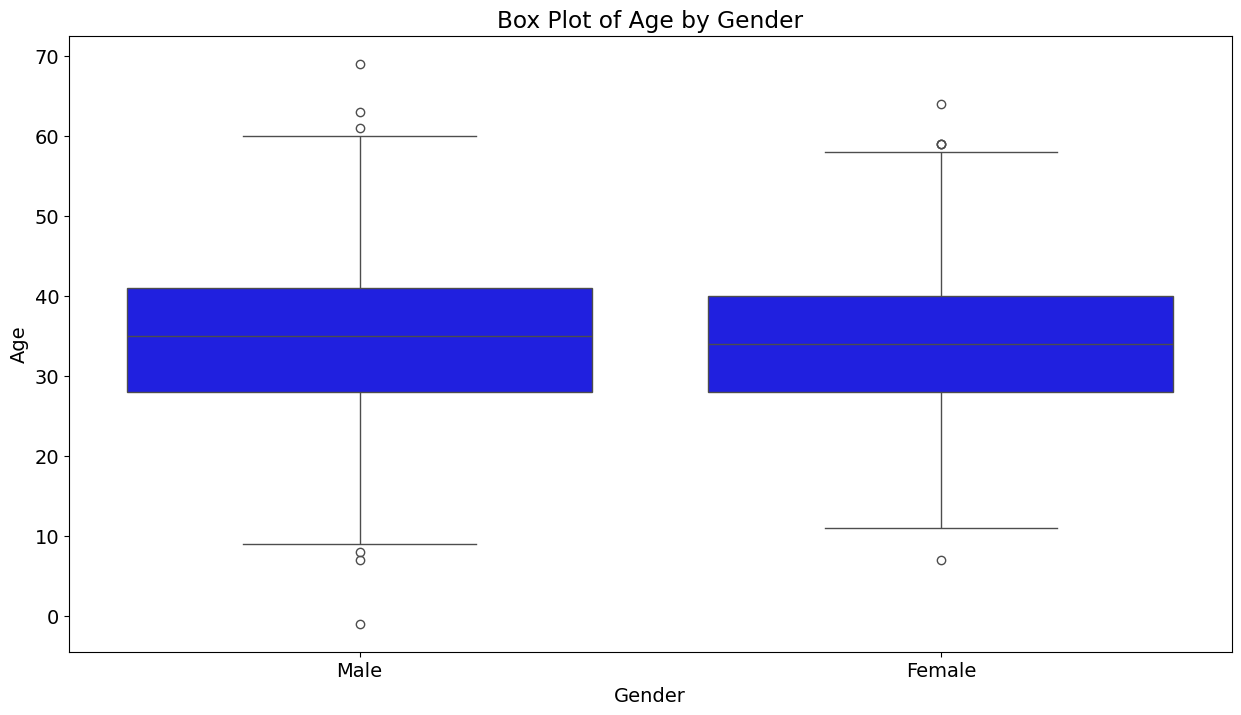

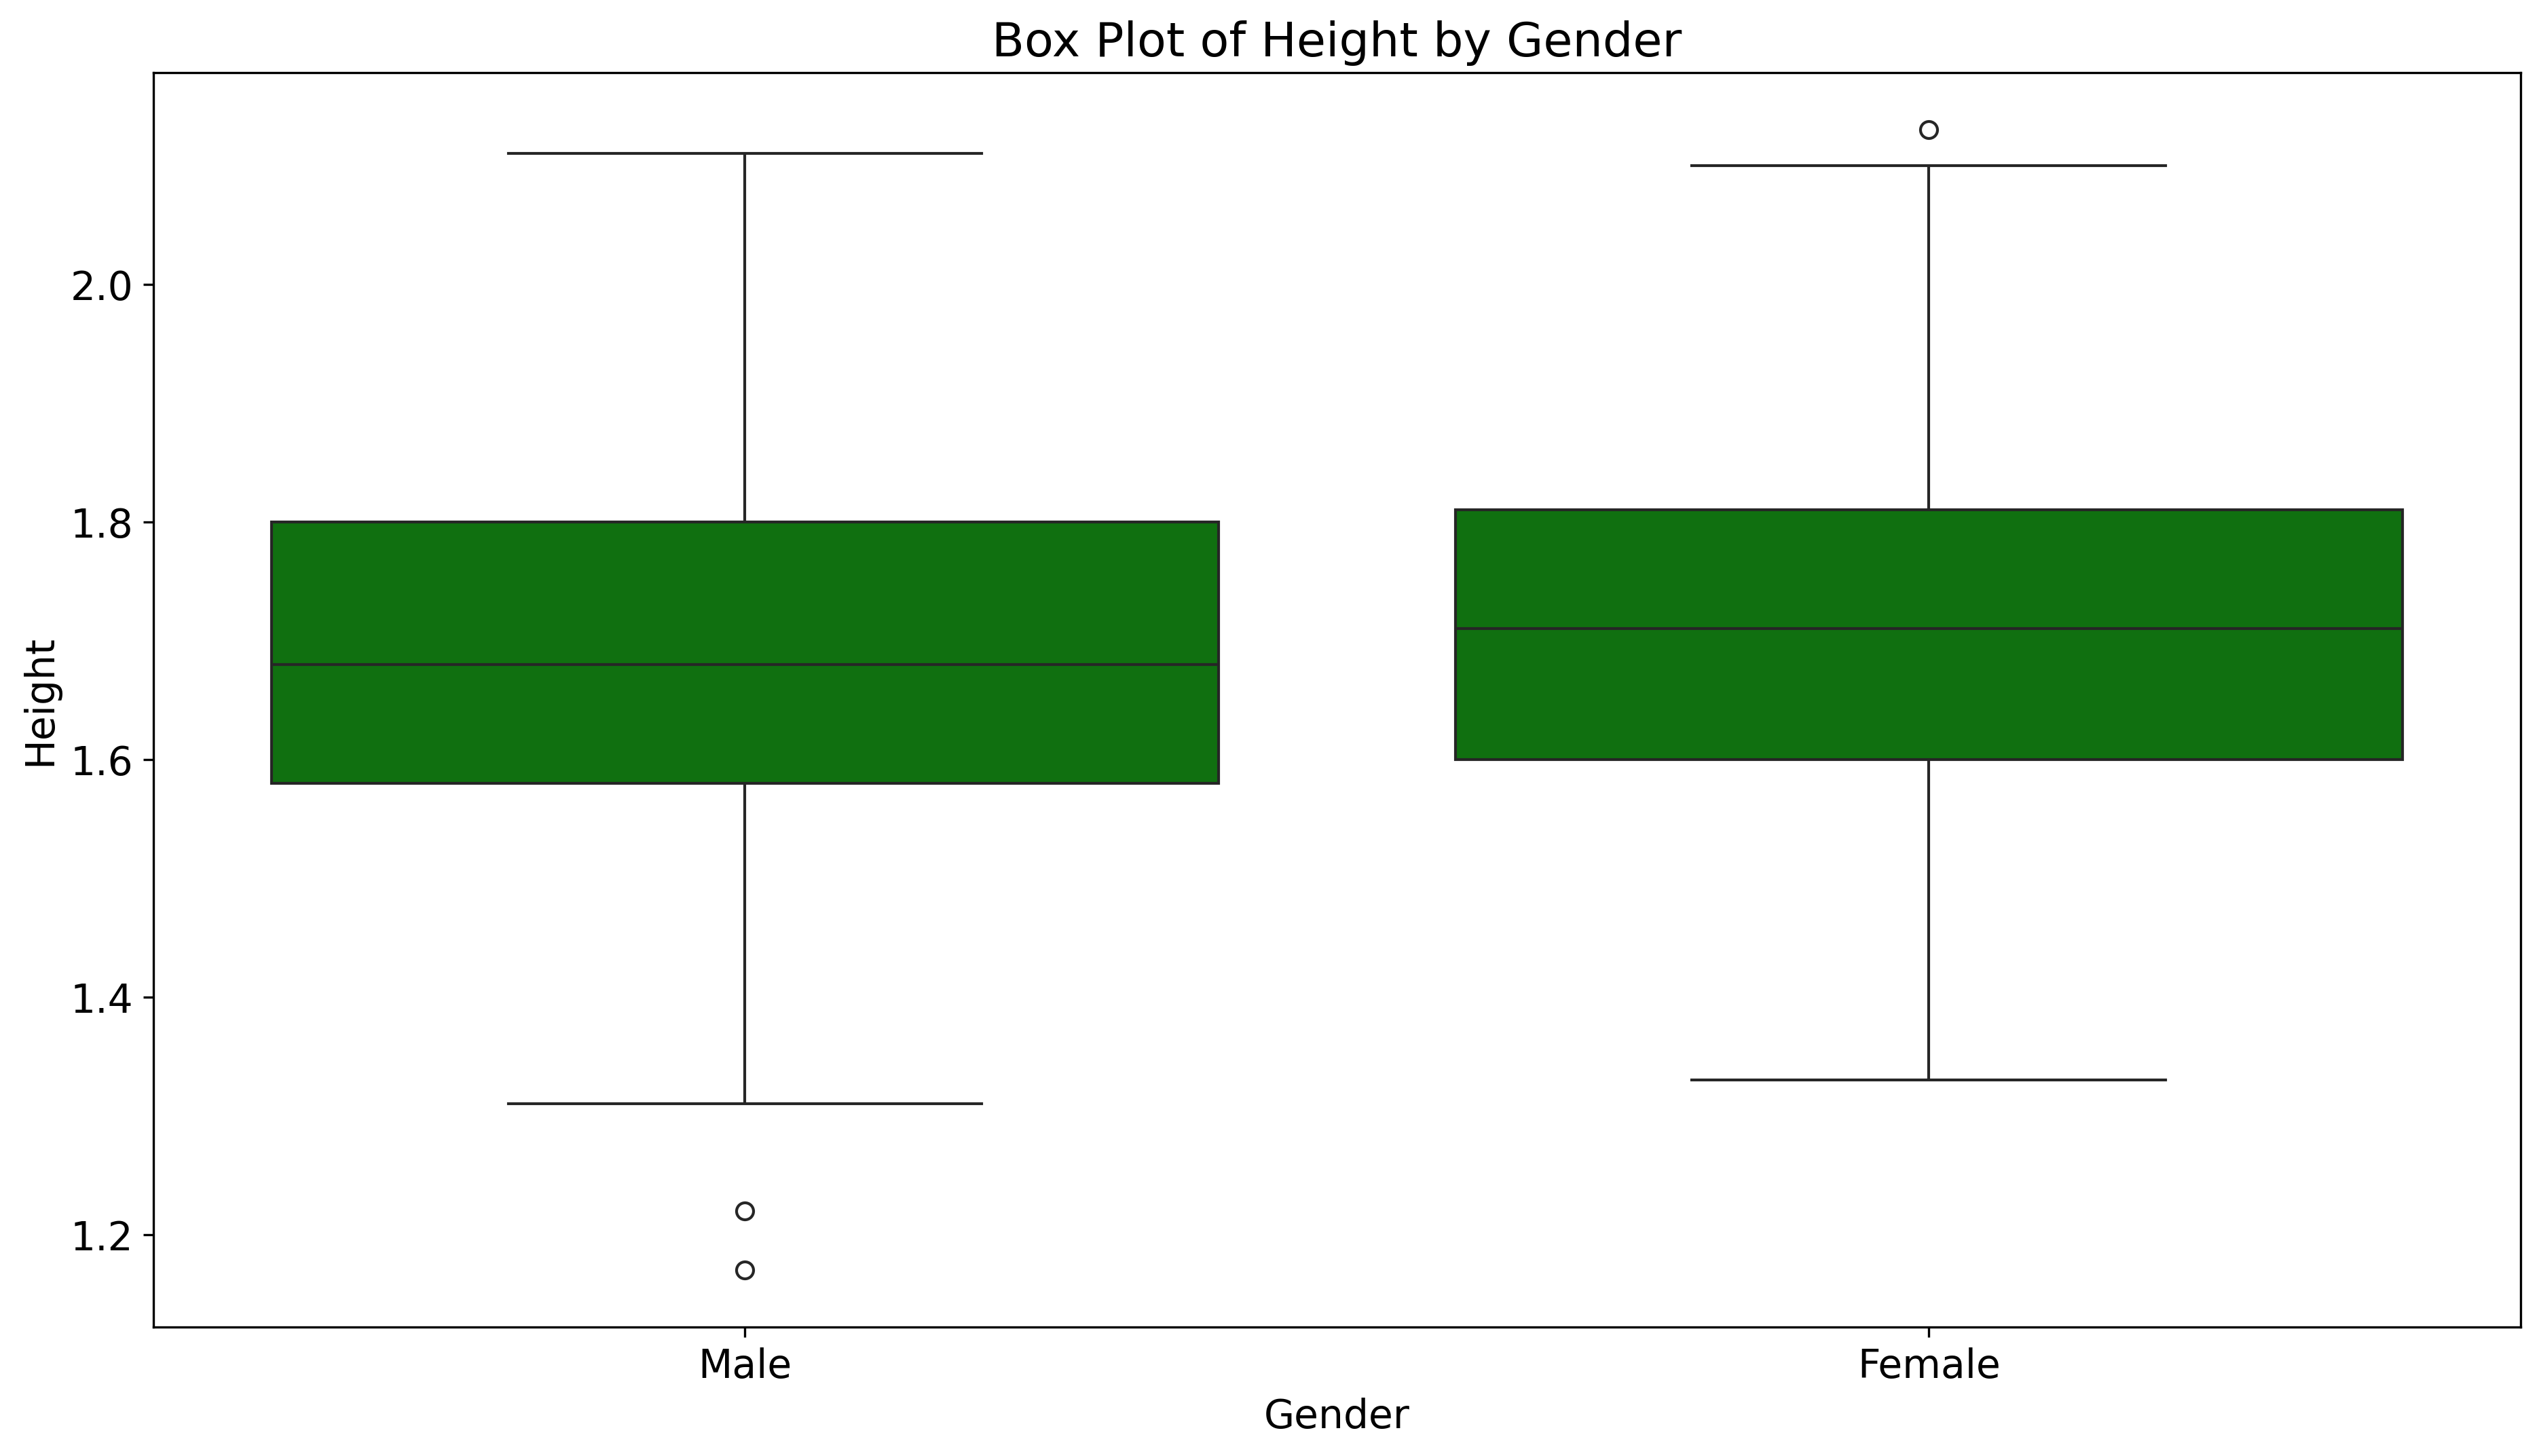

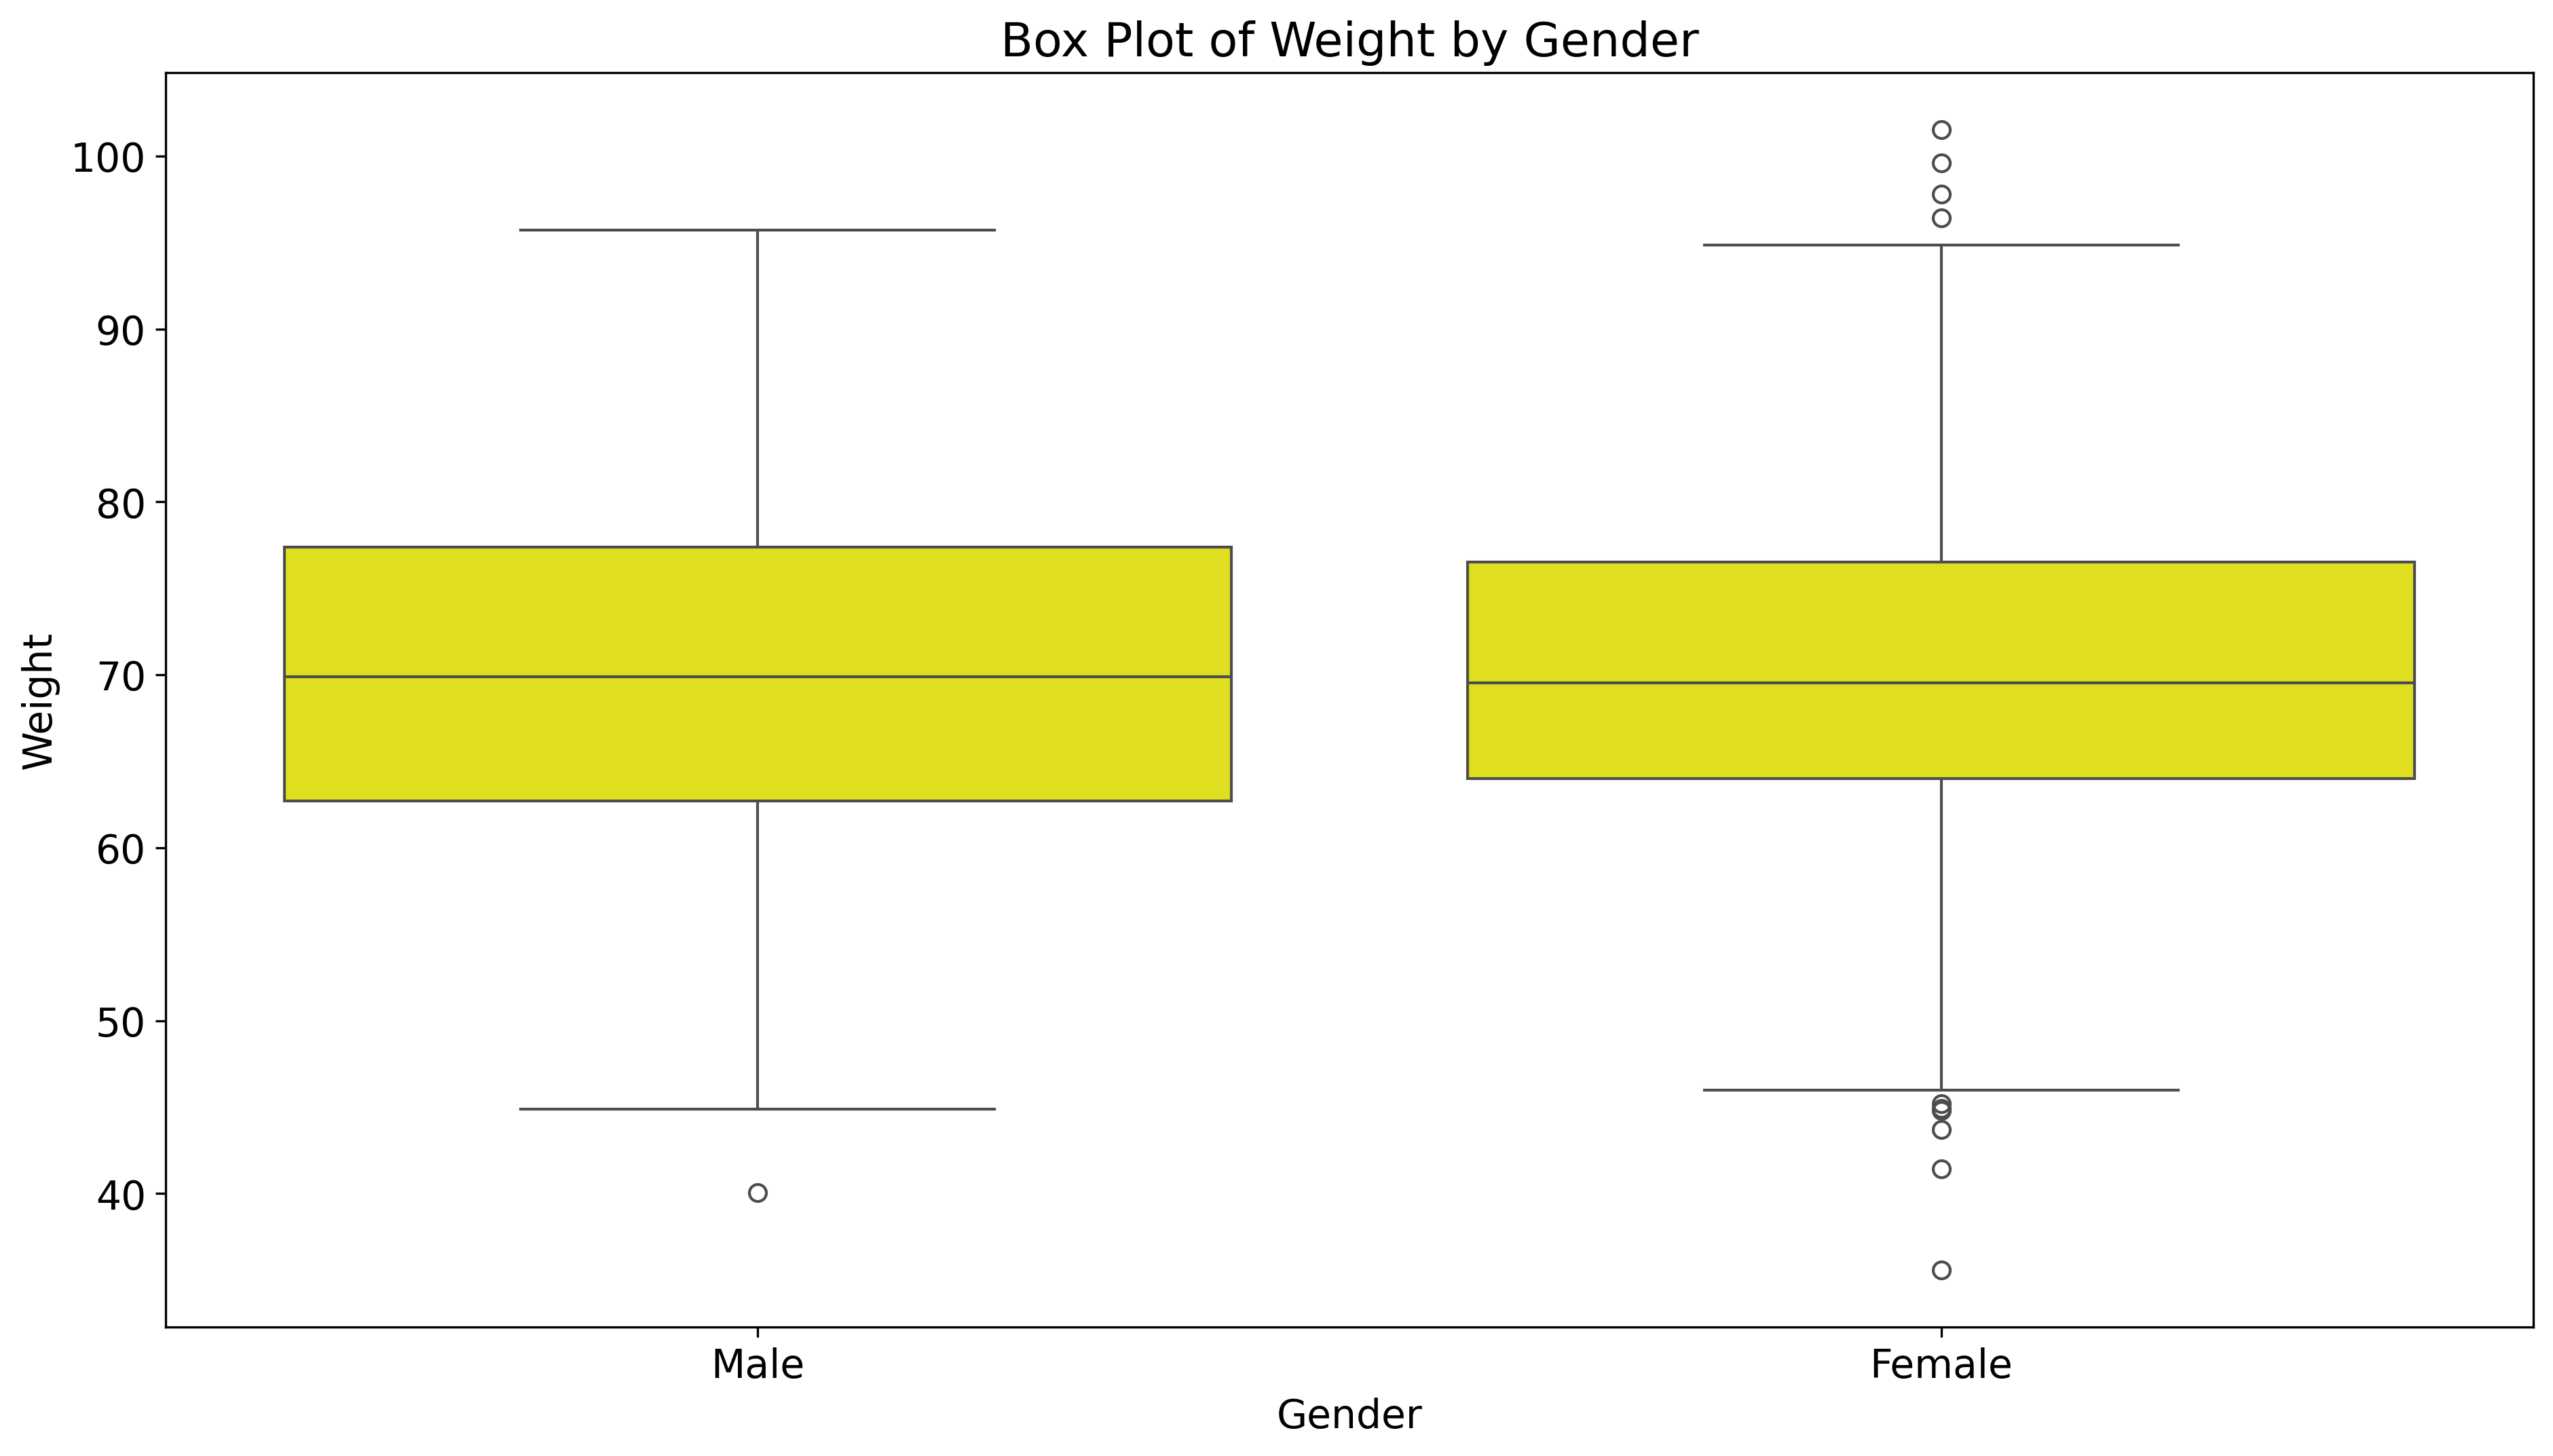

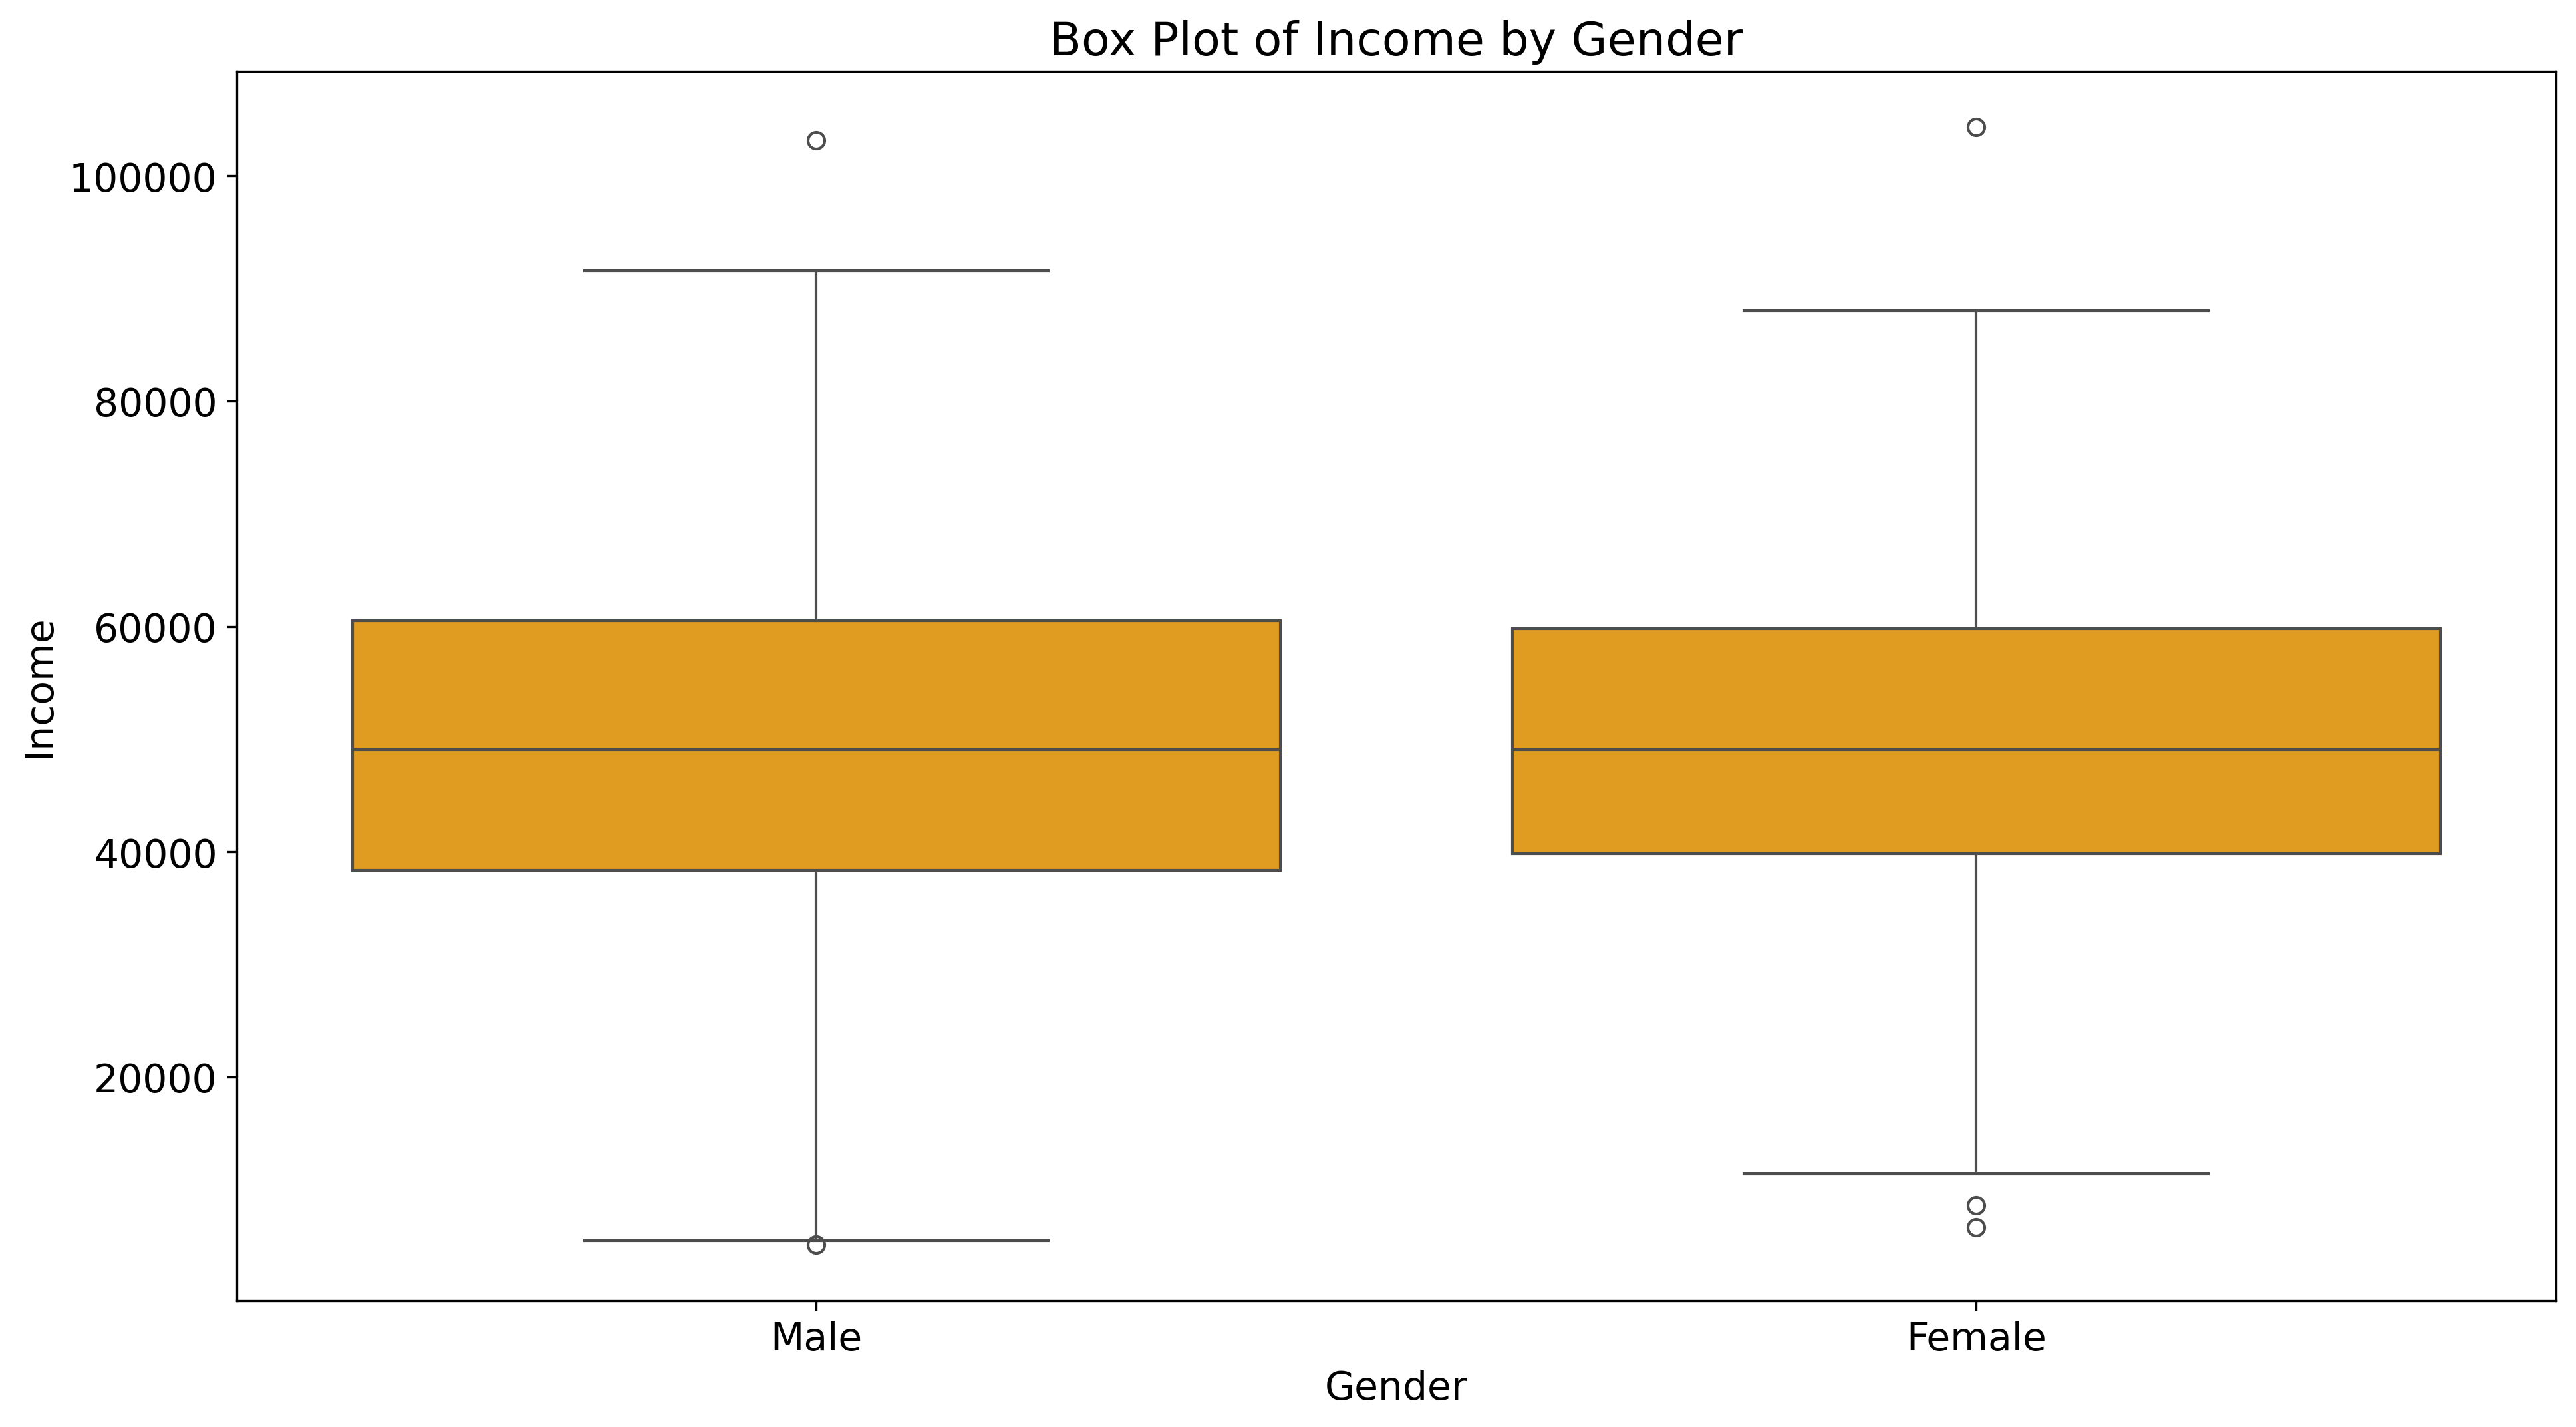

In [11]:
#Boxplots to identify outliers
labels = ['Age', 'Height', 'Weight', 'Income']
for val in labels:
    myBoxPlot(val)



In [12]:
#Calculate the Pearson correlation
import scipy.stats as st 
df = (['age', 'height', 'weight', 'income'])
Pmatrix=np.zeros(shape=(4,4))
#print(Pmatrix)
i=0
j=0
for v1 in df:
    col=data[v1]
    for v2 in df:
        row=data[v2]
        Pmatrix[i][j]=np.round(st.pearsonr(row,col).statistic,3)
        if j == 3:
            j=0
        else:
            j=j+1
    if i < 3:
        i=i+1
print(Pmatrix)

#ANother more elegant way
dfcorr = ['age', 'height', 'weight', 'income']

# Check for constant columns and remove them
valid_numeric_columns = [col for col in dfcorr if data[col].nunique() > 1]

# Compute correlation only for valid numeric columns
correlation_matrix_pearson = data[valid_numeric_columns].corr(method='pearson')

# Debugging step: print correlation matrix
print("Correlation Matrix:\n", correlation_matrix_pearson)


[[ 1.     0.008 -0.005  0.023]
 [ 0.008  1.     0.02   0.001]
 [-0.005  0.02   1.    -0.02 ]
 [ 0.023  0.001 -0.02   1.   ]]
Correlation Matrix:
              age    height    weight    income
age     1.000000  0.007897 -0.004994  0.022824
height  0.007897  1.000000  0.020079  0.001042
weight -0.004994  0.020079  1.000000 -0.020470
income  0.022824  0.001042 -0.020470  1.000000


               age       height       weight         income
count  1000.000000  1000.000000  1000.000000    1000.000000
mean     34.457000     1.697330    70.174710   49583.063280
std       9.797762     0.152665    10.193391   15240.215379
min      -1.000000     1.170000    35.570000    5099.290000
25%      28.000000     1.590000    63.445000   39044.375000
50%      34.500000     1.690000    69.715000   49065.310000
75%      41.000000     1.800000    76.952500   60294.475000
max      69.000000     2.130000   101.520000  104311.940000
Correlation Matrix:
              age    height    weight    income
age     1.000000  0.007897 -0.004994  0.022824
height  0.007897  1.000000  0.020079  0.001042
weight -0.004994  0.020079  1.000000 -0.020470
income  0.022824  0.001042 -0.020470  1.000000


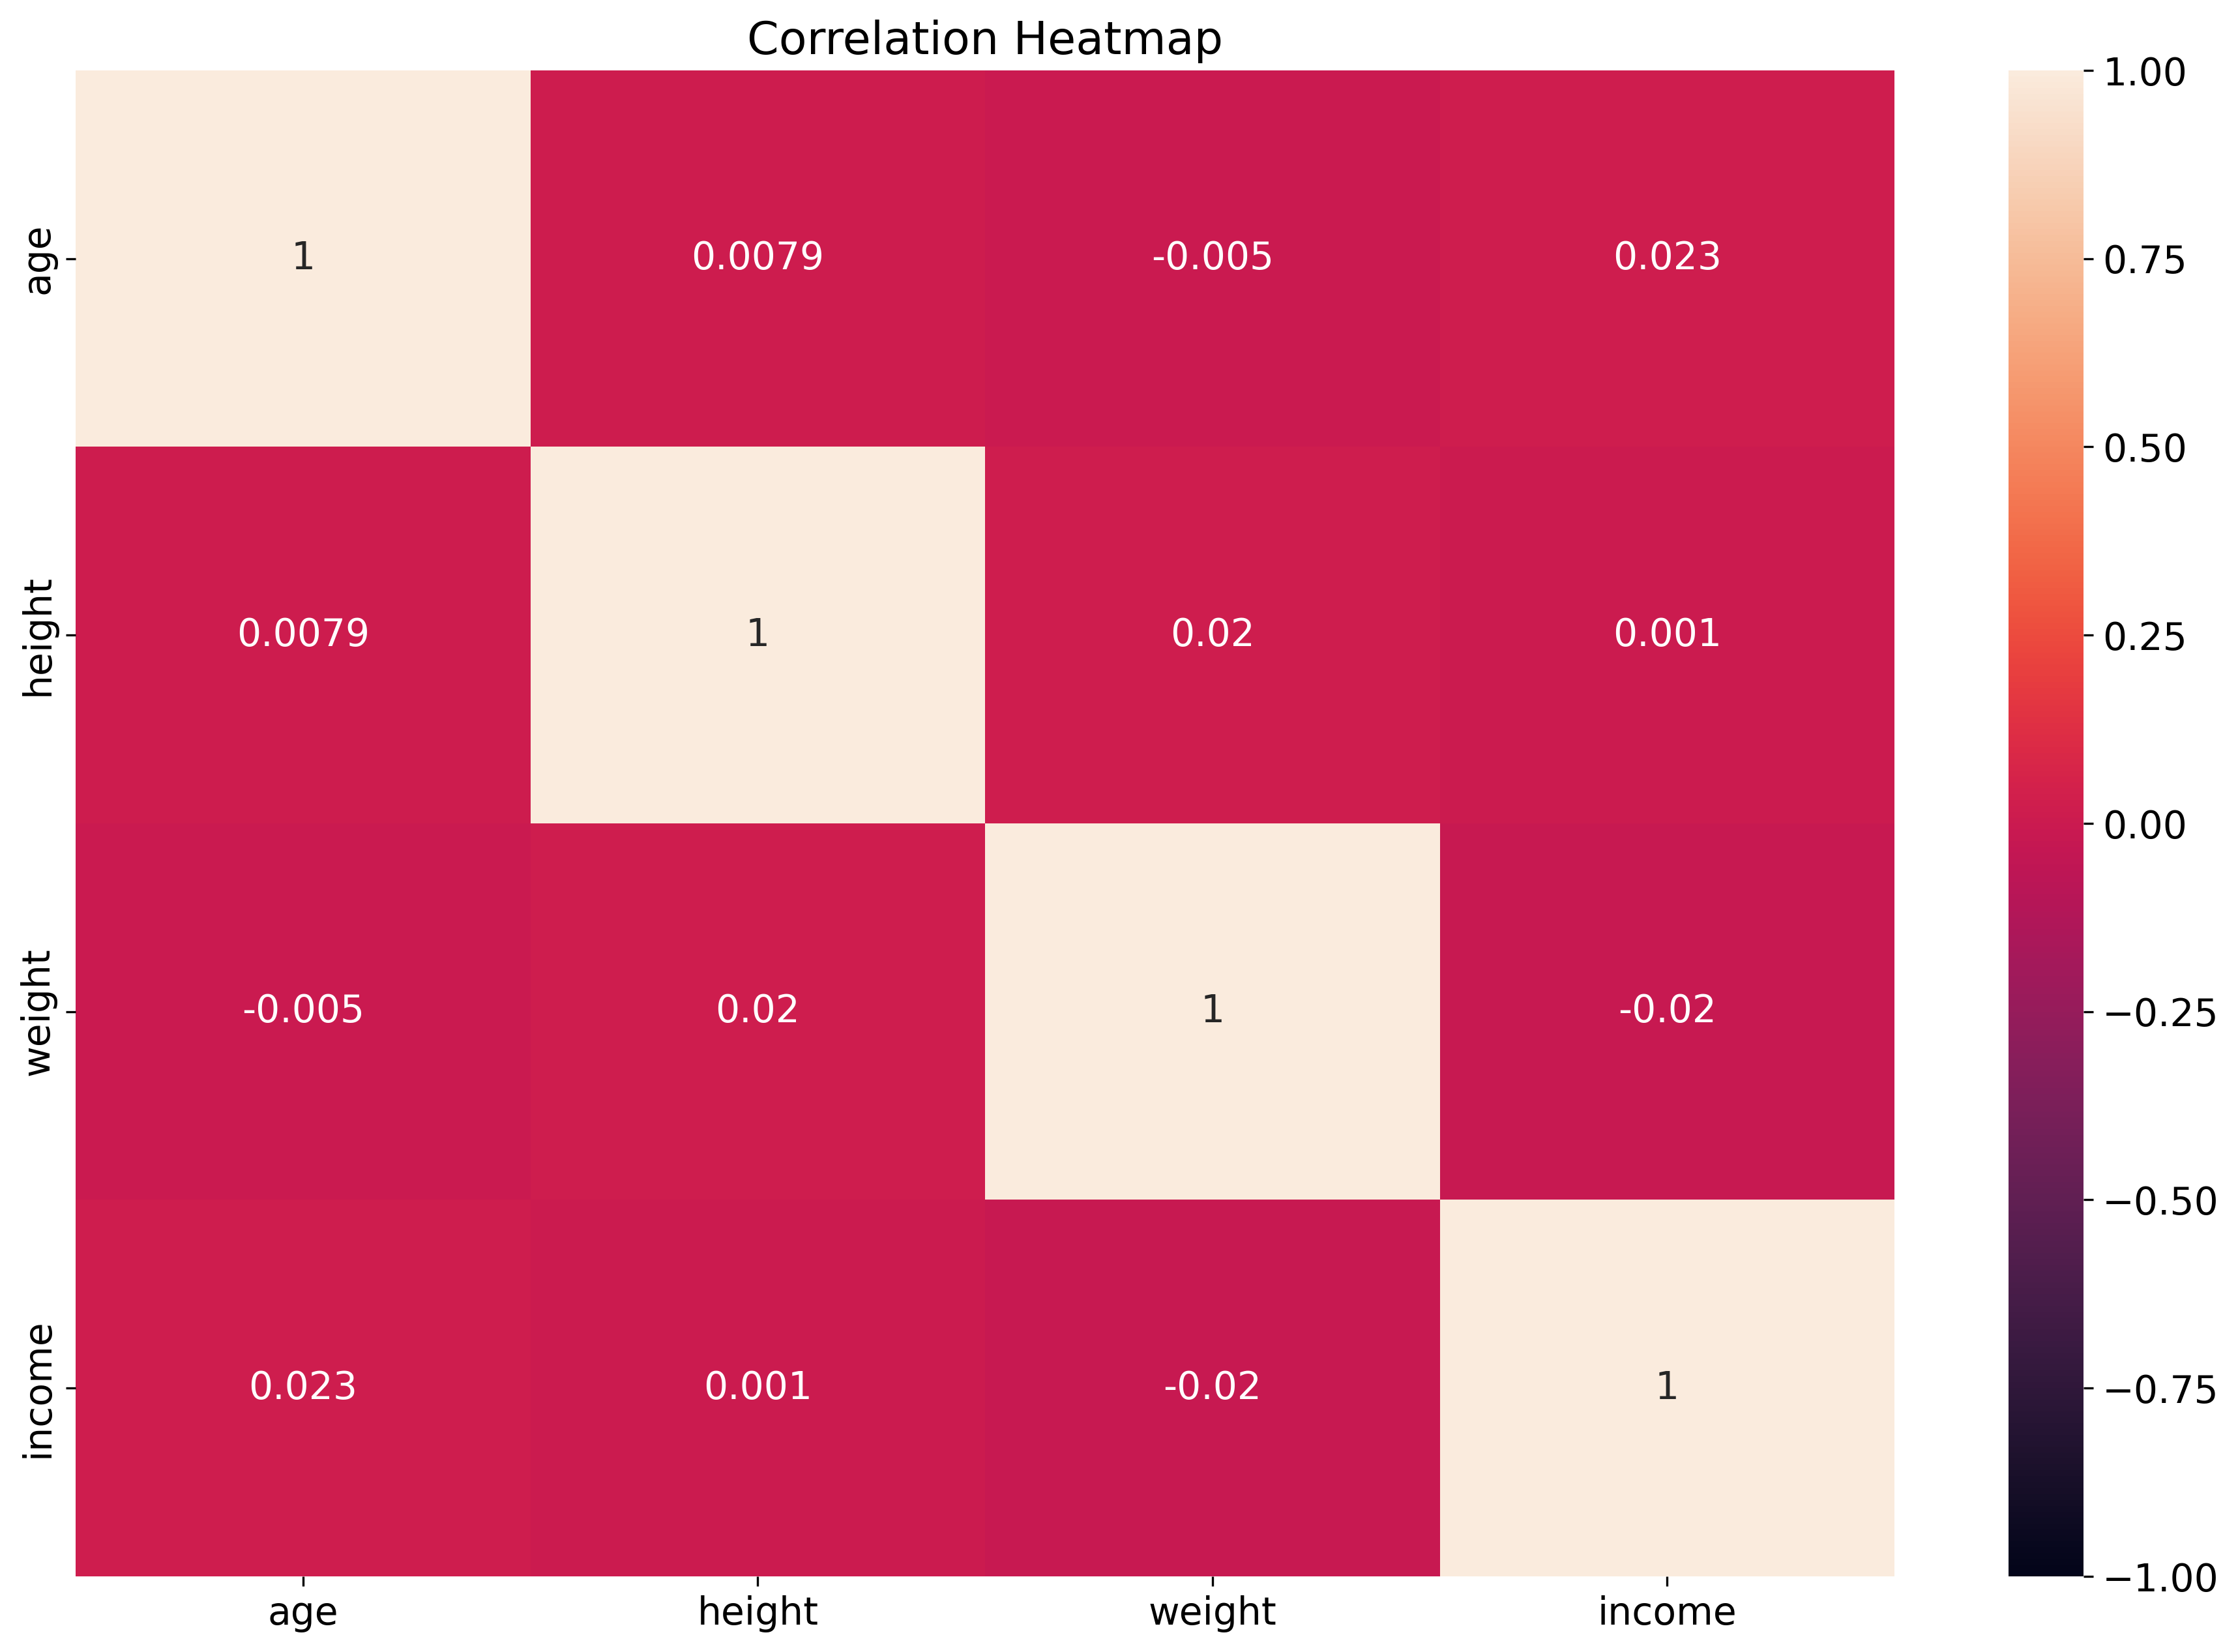

In [13]:
#correlation matrix
dfcorr = ['age', 'height', 'weight', 'income']

# Check for constant columns and remove them
valid_numeric_columns = [col for col in dfcorr if data[col].nunique() > 1]

#print(valid_numeric_columns)

# Generate detailed descriptive statistics for numeric columns
descriptive_stats = data[valid_numeric_columns].describe()
print(descriptive_stats)

# Compute correlation only for valid numeric columns
correlation_matrix_pearson = data[valid_numeric_columns].corr(method='pearson')

# Debugging step: print correlation matrix
print("Correlation Matrix:\n", correlation_matrix_pearson)

# Generate heatmap if correlation matrix is not empty
if not correlation_matrix_pearson.isnull().all().all():
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix_pearson, annot=True,  vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No valid correlations to display. All columns may contain constant values or NaNs.")

In [23]:
#Split the data
gntlemenIncome = data[data['gender'] == 'Male']['income']
ladiesIncome = data[data['gender'] == 'Female']['income']

### T- Test
from scipy.stats import ttest_ind, norm

col='income'

ttest_results = {
    col: ttest_ind(ladiesIncome,gntlemenIncome,equal_var=False, nan_policy='omit')
}

print('income differences between Female vs Male group)')
for col, result in ttest_results.items():
  print(f'{col}: t-statistics = {result.statistic:.4f}, p_value = {result.pvalue:.4f}')

income differences between Female vs Male group)
income: t-statistics = 0.0141, p_value = 0.9888


In [24]:
#Split the data
gntlemenIncome = data[data['gender'] == 'Male']['income']
ladiesIncome = data[data['gender'] == 'Female']['income']

### T- Test
from scipy.stats import ttest_ind, norm

col='income'

ttest_results = {
    col: ttest_ind(gntlemenIncome,ladiesIncome,equal_var=False, nan_policy='omit')
}

print('income differences between Male vs Female group)')
for col, result in ttest_results.items():
  print(f'{col}: t-statistics = {result.statistic:.4f}, p_value = {result.pvalue:.4f}')

income differences between Male vs Female group)
income: t-statistics = -0.0141, p_value = 0.9888
